# <center> Motor Annual Insurance Claim ML Project</center>
<center>© Explore Data Science Academy</center>


---

## Problem Statement:
<div style="text-align: justify;">
This project seeks to optimize the prediction of motor insurance claims by evaluating and comparing various machine learning algorithms. The primary objective is to assess the performance and interpretability of these algorithms comprehensively. The analysis aims to identify the most effective algorithm for enhancing existing insurance claim prediction models in production. By achieving this, the project intends to not only improve the accuracy of claim predictions but also contribute to increased stakeholder confidence and more informed decision-making within the insurance industry.
</div>

<a name="table-of-contents"></a>


---

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Data Dependencies</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Preprocessing</a>

<a href=#five>5. Feature Engineering/Selection</a>

<a href=#six>6. Model and Model Evaluation</a>

<a id="one"></a>

# Importing Data Dependences

[Table of Contents](#table-of-contents)

In [1]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>

# Loading the Data

[Back to Table of Contents](#table-of-contents)

In [2]:
# Specify the path to the zip file
zip_file = r'C:\Users\rave_consolidate\Desktop\internship-project-2301-05\src\data\data_files.zip'

with zipfile.ZipFile(zip_file, mode="r") as archive:
    archive.printdir()

File Name                                             Modified             Size
Mobillity_test.csv                             2023-08-10 06:19:16       315476
Mobillity_train.csv                            2023-08-10 06:17:10      1258927
PMD_test.csv                                   2023-08-11 07:18:24      5152691
PMD_train.csv                                  2023-08-11 07:18:34     20610972


In [3]:
# load the mobility train data set

with zipfile.ZipFile(zip_file) as train:
   # open the csv file in the dataset
   with train.open("Mobillity_train.csv") as f:
        # read the dataset
        mob_train = pd.read_csv(f)

In [4]:
# load the mobility test data set

with zipfile.ZipFile(zip_file) as test_file:
   # open the csv file in the dataset
   with test_file.open("Mobillity_test.csv") as mob_test_csv:
        # read the dataset
        mob_test = pd.read_csv(mob_test_csv)

In [5]:
# load the pmd train data set

with zipfile.ZipFile(zip_file) as pmd:
    # open the cvs file in the list
    with pmd.open("PMD_train.csv") as pmd_train_pmd:
        # read the data set
        pmd_train = pd.read_csv(pmd_train_pmd)

In [6]:
# # load the pmd data set

# with zipfile.ZipFile(zip_file) as pmd:
#     # open the cvs file in the list
#     with pmd.open("PMD_train.csv") as pmd_train_pmd:
#         # read the data set
#         pmd_train = pd.read_csv(pmd_train_pmd)

In [7]:
# load the pmd data set

# with zipfile.ZipFile(zip_file) as pmd:
#     # open the cvs file in the list
#     with pmd.open("PMD_train.csv") as pmd_test_pmd:
#         # read the data set
#         pmd_test = pd.read_csv(pmd_test_pmd)

<a id="three"></a>

# Exploratory Data Analysis

[Back to Table of Contents](#table-of-contents)

In [8]:
# print the first 5 rows of the data set

mob_train.head(10)

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims
0,KDY034NW,2019,4,trailers,klerksdorp,325000.0,32500.0,0.250000,0.00
1,JZX224MP,2020,0,private/ldv,witbank,417058.0,20852.9,0.250000,0.00
2,HPP748EC,2015,6,trailers,portelizabeth,150000.0,15000.0,1.000000,66548.58
3,HM01YZGP,2018,3,trailers,NaN,371910.0,37191.0,0.250000,0.00
4,KPD308NW,2021,2,trailers,klerksdorp,495363.0,49536.3,0.166666,0.00
5,KF90HYGP,2021,0,trailers,nigel,456974.0,45697.4,0.333333,0.00
6,HGZ527EC,2014,9,vehicles>3500kg,portelizabeth,660110.0,66011.0,0.250000,0.00
7,HR59RWGP,2018,5,trailers,randfontein,297000.0,29700.0,0.250000,0.00
8,KP10RZGP,2022,1,vehicles>3500kg,bronkhorstspruit,1595000.0,159500.0,0.250000,0.00
9,HKZ816MP,2014,7,trailers,pretoria,230000.0,23000.0,0.583333,0.00


In [9]:
# checking for missing values or null values

mob_train.isna().sum()

vehicle_regno      1
vehicle_year       0
vehicle_age        0
vehicle_type       0
city             389
sum_insured        0
excess             0
exposure           0
annual_claims      0
dtype: int64

In [10]:
mob_train.shape

(20415, 9)

In [11]:
mob_test.head()

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims
0,KC45WKGP,2021,1,trailers,germiston,291813.0,29181.3,0.166666,0.00
1,HJT095FS,2019,3,vehicles>3500kg,henneman,1200000.0,120000.0,0.666666,5901.28
2,FWS239FS,2016,7,trailers,henneman,143939.0,15000.0,0.250000,0.00
3,CV46RLGP,2013,10,trailers,randfontein,259325.0,25932.5,0.250000,0.00
4,HB77PPGP,2017,6,trailers,randburg,249435.0,24943.5,1.000000,0.00


In [12]:
mob_test.shape

(5104, 9)

In [13]:
# merged the mobility trainset and testset together

df = pd.concat([mob_train, mob_test], axis = 0)

In [14]:
df.head()

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims
0,KDY034NW,2019,4,trailers,klerksdorp,325000.0,32500.0,0.250000,0.00
1,JZX224MP,2020,0,private/ldv,witbank,417058.0,20852.9,0.250000,0.00
2,HPP748EC,2015,6,trailers,portelizabeth,150000.0,15000.0,1.000000,66548.58
3,HM01YZGP,2018,3,trailers,NaN,371910.0,37191.0,0.250000,0.00
4,KPD308NW,2021,2,trailers,klerksdorp,495363.0,49536.3,0.166666,0.00


In [15]:
# Total number of rows and columns

num_row = df.shape[0]
print(f'The total number of rows is: {num_row}')
num_col = df.shape[1]
print(f'The total number of columns is: {num_col}')

The total number of rows is: 25519
The total number of columns is: 9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25519 entries, 0 to 5103
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vehicle_regno  25517 non-null  object 
 1   vehicle_year   25519 non-null  int64  
 2   vehicle_age    25519 non-null  int64  
 3   vehicle_type   25519 non-null  object 
 4   city           25022 non-null  object 
 5   sum_insured    25519 non-null  float64
 6   excess         25519 non-null  float64
 7   exposure       25519 non-null  float64
 8   annual_claims  25519 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.9+ MB


In [17]:
# checking for null values

df.isnull().sum()

vehicle_regno      2
vehicle_year       0
vehicle_age        0
vehicle_type       0
city             497
sum_insured        0
excess             0
exposure           0
annual_claims      0
dtype: int64

In [18]:
df.duplicated().sum()

1

In [19]:
df

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims
0,KDY034NW,2019,4,trailers,klerksdorp,3.250000e+05,32500.000000,0.250000,0.00
1,JZX224MP,2020,0,private/ldv,witbank,4.170580e+05,20852.900000,0.250000,0.00
2,HPP748EC,2015,6,trailers,portelizabeth,1.500000e+05,15000.000000,1.000000,66548.58
3,HM01YZGP,2018,3,trailers,NaN,3.719100e+05,37191.000000,0.250000,0.00
4,KPD308NW,2021,2,trailers,klerksdorp,4.953630e+05,49536.300000,0.166666,0.00
...,...,...,...,...,...,...,...,...,...
5099,JF20KYGP,2019,3,trailers,delmas,3.500000e+05,35000.000000,0.583333,0.00
5100,KX06JWGP,2022,1,vehicles>3500kg,rosslyn,2.845031e+06,284503.100000,0.250000,0.00
5101,FDC360MP,1994,28,vehicles>3500kg,durban,3.000000e+05,30000.000000,0.083333,0.00
5102,TBA1658,2022,0,private/ldv,balfour,1.099995e+06,54999.750000,0.083333,0.00


In [20]:
# descriptive analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_year,25519.0,2016.004154,5.964126,1972.000000,2014.00,2018.000000,2020.000000,2023.00
vehicle_age,25519.0,6.065285,5.891118,0.000000,2.00,5.000000,9.000000,51.00
sum_insured,25519.0,665050.687646,684962.251730,2000.000000,210000.00,340688.000000,900024.000000,10000000.00
excess,25519.0,66036.699497,68156.828771,2500.000000,20691.00,33206.300000,89276.000000,1000000.00
exposure,25519.0,0.505176,0.329561,0.083333,0.25,0.333333,0.916666,1.00
annual_claims,25519.0,8691.689211,86438.497862,0.000000,0.00,0.000000,0.000000,3226903.63


**Observation**
- The Total number of Registered Vehicles is 25519
- The Average Age of vehicles in the data set is 6
- The Average Annual Insurance claim is 8691.689Rand
- The Average Sum Insured is 665,800.7Rand
- The Average Excess payable in making annual claims is 66036.7Rand

In [21]:
# Correlation Analysis

corr_matrix = df.select_dtypes(exclude='object').corr()
corr_matrix

,vehicle_year,vehicle_age,sum_insured,excess,exposure,annual_claims
vehicle_year,1.000000,-0.989580,0.444661,0.428405,-0.075175,0.036984
vehicle_age,-0.989580,1.000000,-0.436741,-0.420570,0.043680,-0.041282
sum_insured,0.444661,-0.436741,1.000000,0.995085,-0.083090,0.094179
excess,0.428405,-0.420570,0.995085,1.000000,-0.082009,0.095181
exposure,-0.075175,0.043680,-0.083090,-0.082009,1.000000,0.050297
annual_claims,0.036984,-0.041282,0.094179,0.095181,0.050297,1.000000


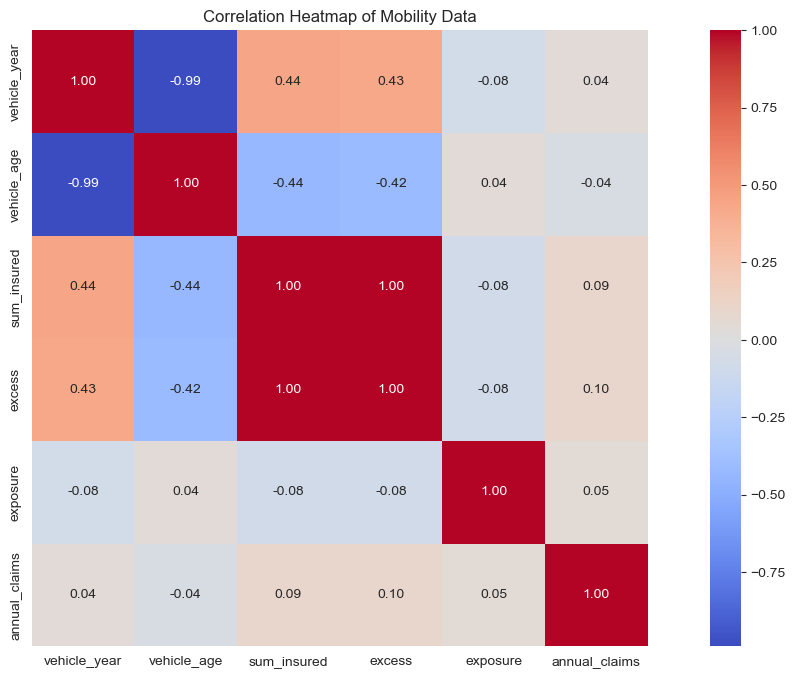

In [22]:
plt.figure(figsize = (16, 8))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Mobility Data")
plt.show()

**Observation**
- The Excess Insurance and Sum Insured are highly correlated

In [23]:
data = df.drop_duplicates()
data = data.reset_index().drop('index', axis = 1)

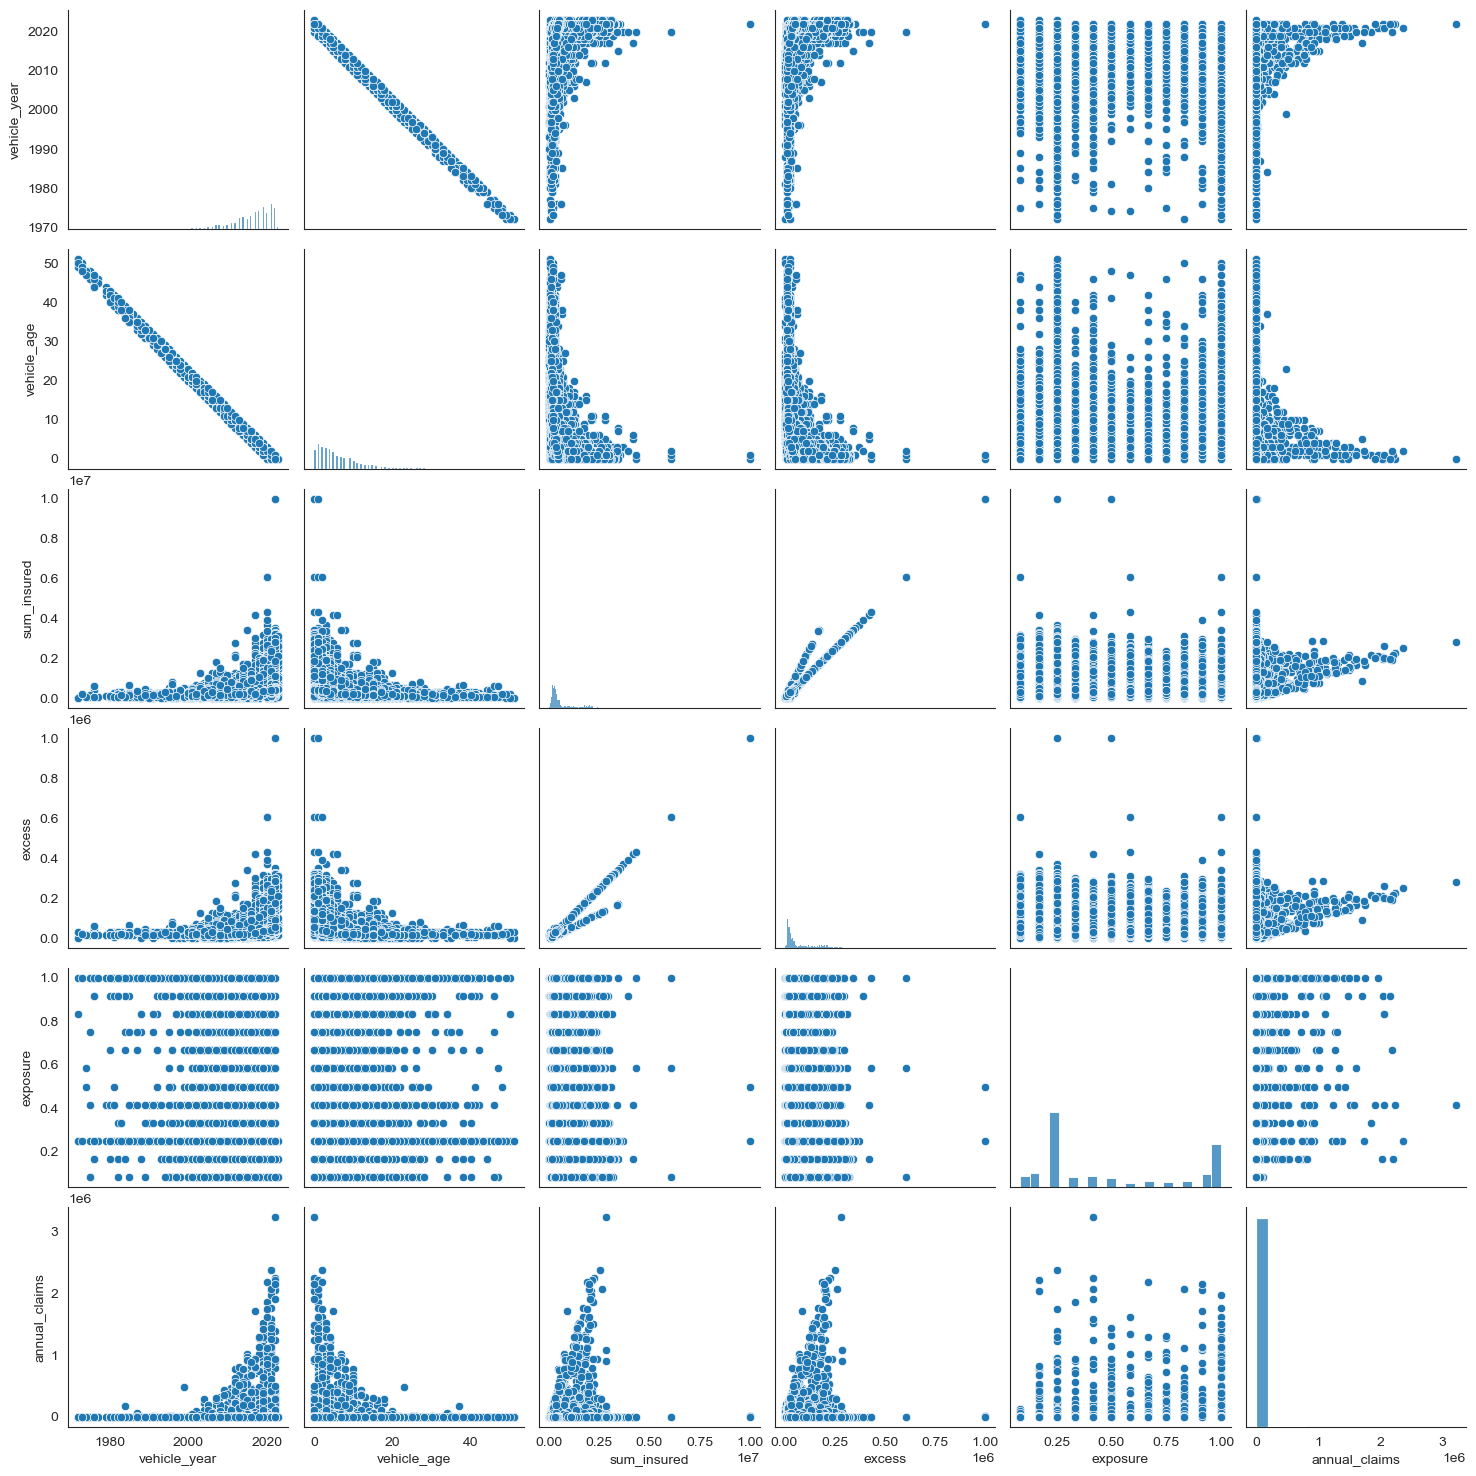

In [24]:
sns.pairplot(data)

Text(0.5, 1.0, 'Distribution of Annual Claims')

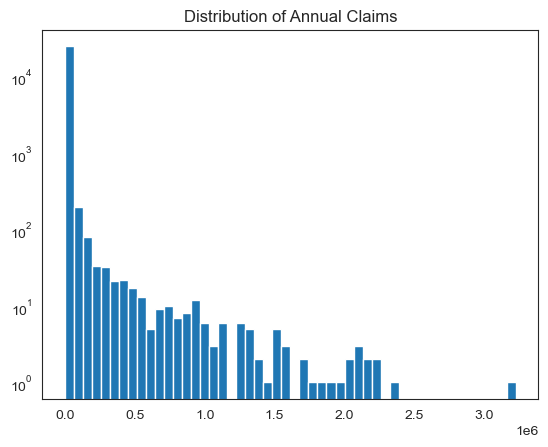

In [25]:
# Let further investigate the annual claims which is our target variable by looking at the distribution

plt.hist(data['annual_claims'], log=True, bins = 50,)
plt.title('Distribution of Annual Claims')

**Observation**
- The annual claims are skewed toward the left indicating that there is presence of large 0 claims in the data set

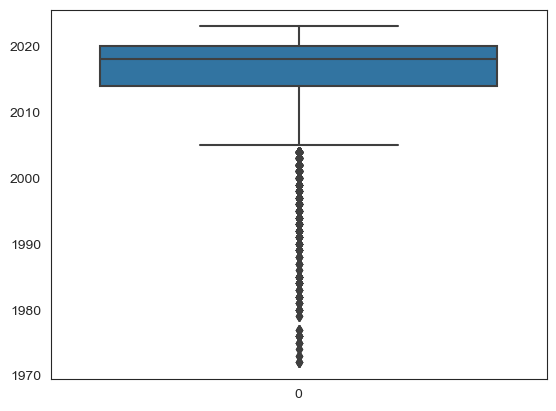

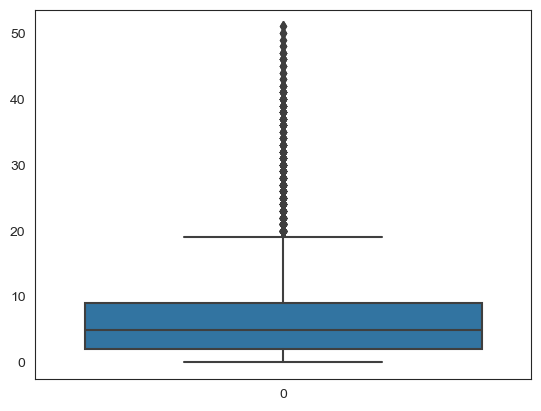

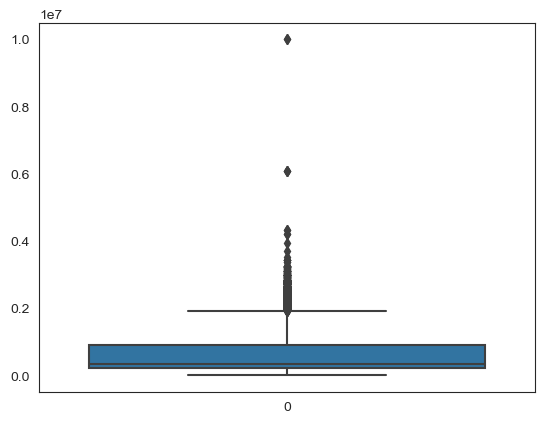

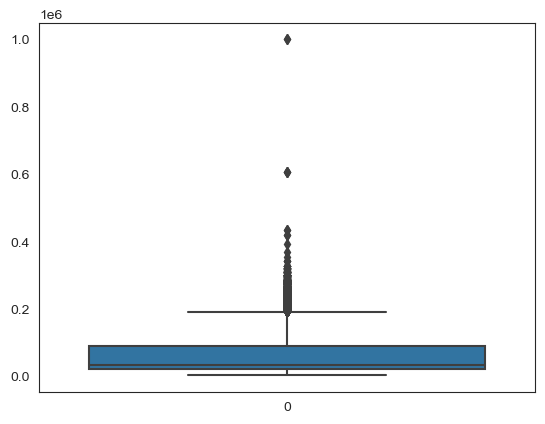

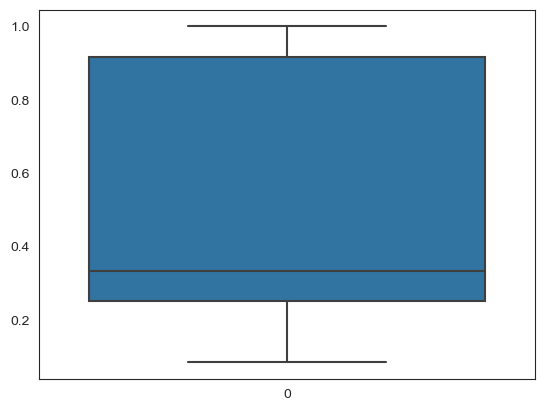

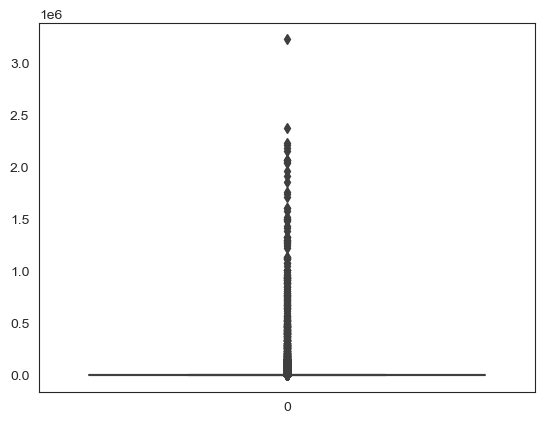

In [26]:
# checking for outliers using the box plot

def boxplots(col):
    sns.boxplot(data[col])
    return plt.show()

for i in list(data.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplots(i)

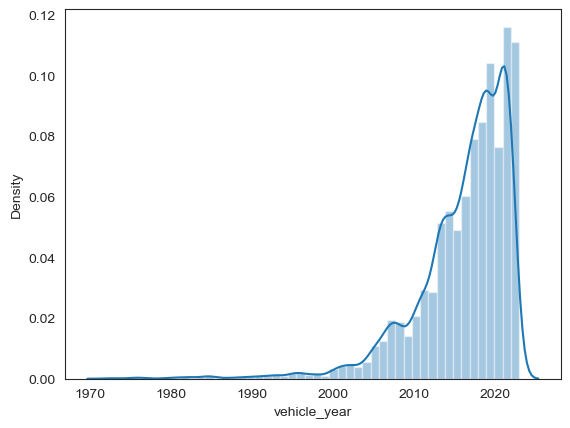

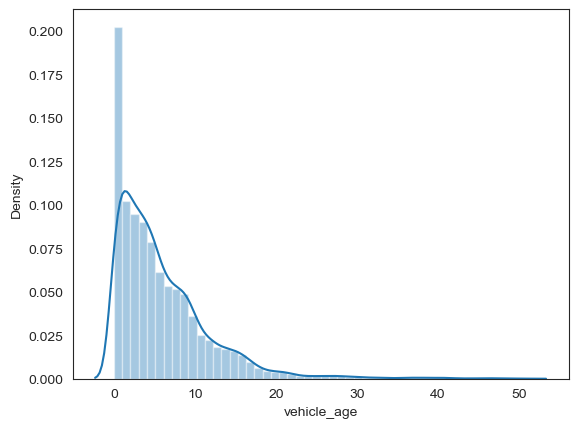

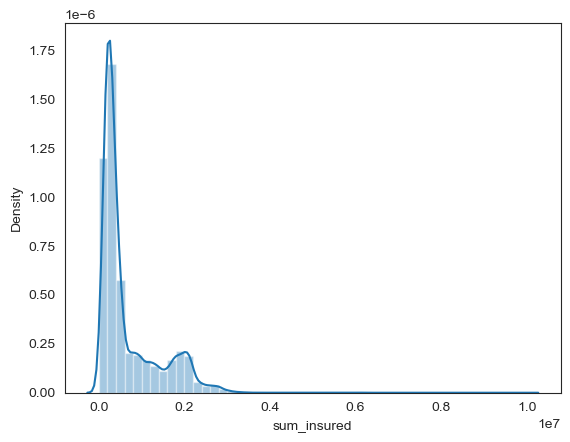

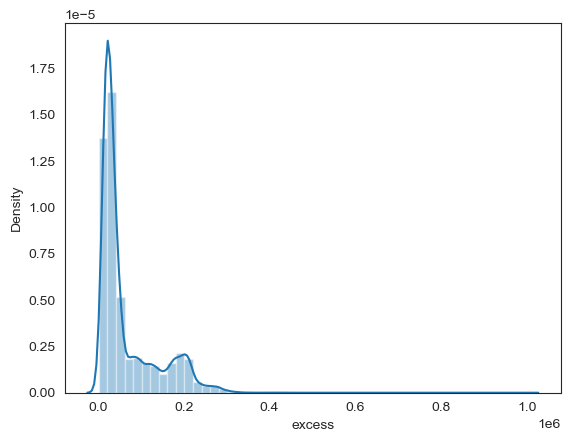

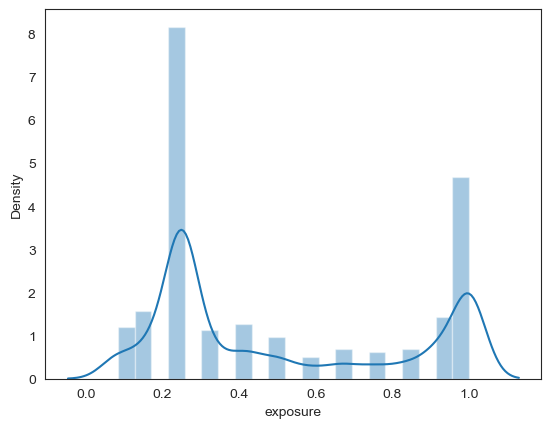

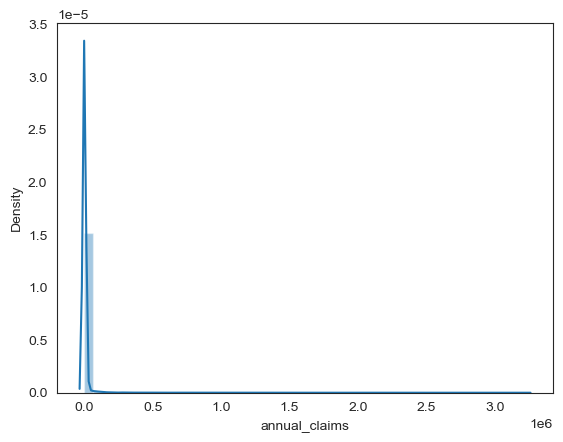

In [27]:
# checking the distribution of each variable using the distplot

def distplots(col):
    sns.distplot(data[col])
    return plt.show()

for i in list(data.select_dtypes(exclude = ['object']).columns)[0:]:
    distplots(i)

**Observation**
- About 75% of the vehicles in the data set were registered between year 2000 and 2023
- The box plot and the distribution plot signifies the presence of outliers between 1970 and 2009

In [28]:
no_city_registration = data.city.value_counts().sum()
no_city = data.city.nunique()

print(f'Total Registration in the data set: {no_city_registration}')
print(f'The Total number of Cities Registration was carried out: {no_city}')

Total Registration in the data set: 25021
The Total number of Cities Registration was carried out: 93


In [29]:
data = data.dropna()

data.head()

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims
0,KDY034NW,2019,4,trailers,klerksdorp,325000.0,32500.0,0.250000,0.00
1,JZX224MP,2020,0,private/ldv,witbank,417058.0,20852.9,0.250000,0.00
2,HPP748EC,2015,6,trailers,portelizabeth,150000.0,15000.0,1.000000,66548.58
4,KPD308NW,2021,2,trailers,klerksdorp,495363.0,49536.3,0.166666,0.00
5,KF90HYGP,2021,0,trailers,nigel,456974.0,45697.4,0.333333,0.00


In [30]:
# get a dataframe grouped by city

city_df = data.groupby('city').agg(total_claims_of_city=('annual_claims', 'sum'),
                                   num_reg_vehicles=('annual_claims', 'count',),
                                   total_sum_insured=('sum_insured', 'sum'),
                                   total_excess_insurance=('excess', 'sum'),
                                   average_vehicle_age=('vehicle_age', 'mean')
                                   )

city_df = city_df.reset_index()
city_df.head()

,city,total_claims_of_city,num_reg_vehicles,total_sum_insured,total_excess_insurance,average_vehicle_age
0,alberton,47702.20,23,6.170914e+06,5.981714e+05,11.652174
1,balfour,215865.63,124,8.441808e+07,8.303491e+06,4.959677
2,bellville,12811.22,30,4.984703e+07,4.984703e+06,2.300000
3,benoni,201867.77,127,9.130188e+07,9.097378e+06,7.149606
4,bethal,0.00,1,7.590000e+05,7.590000e+04,6.000000


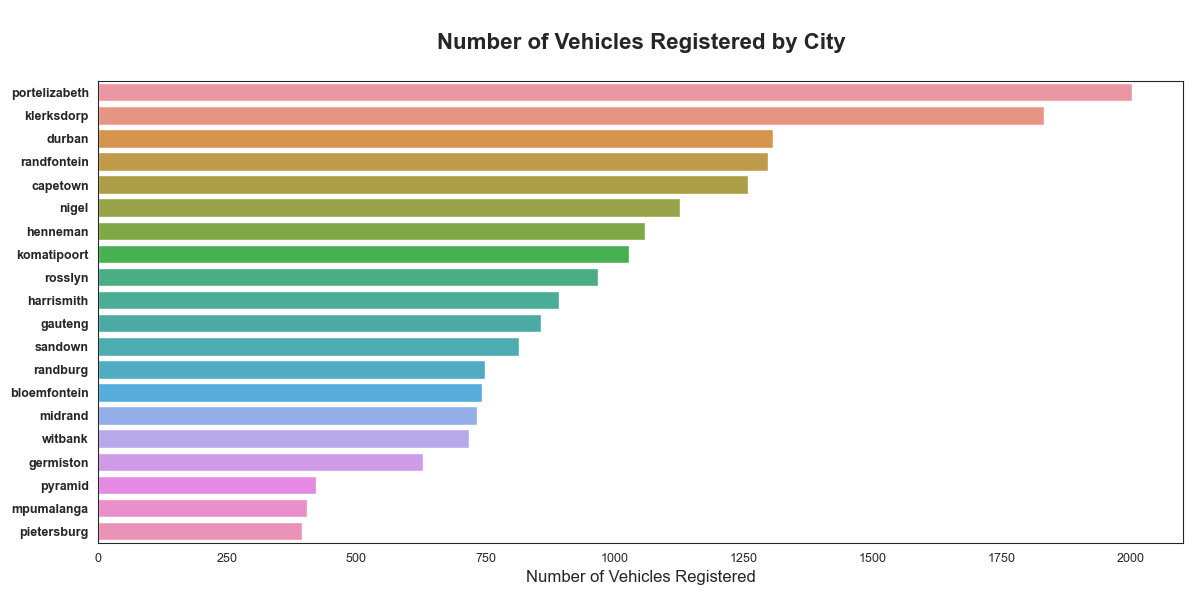

In [31]:
# Cities with the highest vehicle registration

plt.figure(figsize=(14, 6))
sns.barplot(data = city_df.sort_values('num_reg_vehicles', ascending=False).head(20), x = 'num_reg_vehicles', y = 'city', orient = 'h')
plt.title('\nNumber of Vehicles Registered by City\n', weight = 'bold', fontsize = 16)
plt.xlabel('Number of Vehicles Registered', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The city with the most registered vehicles is Portelizabeth

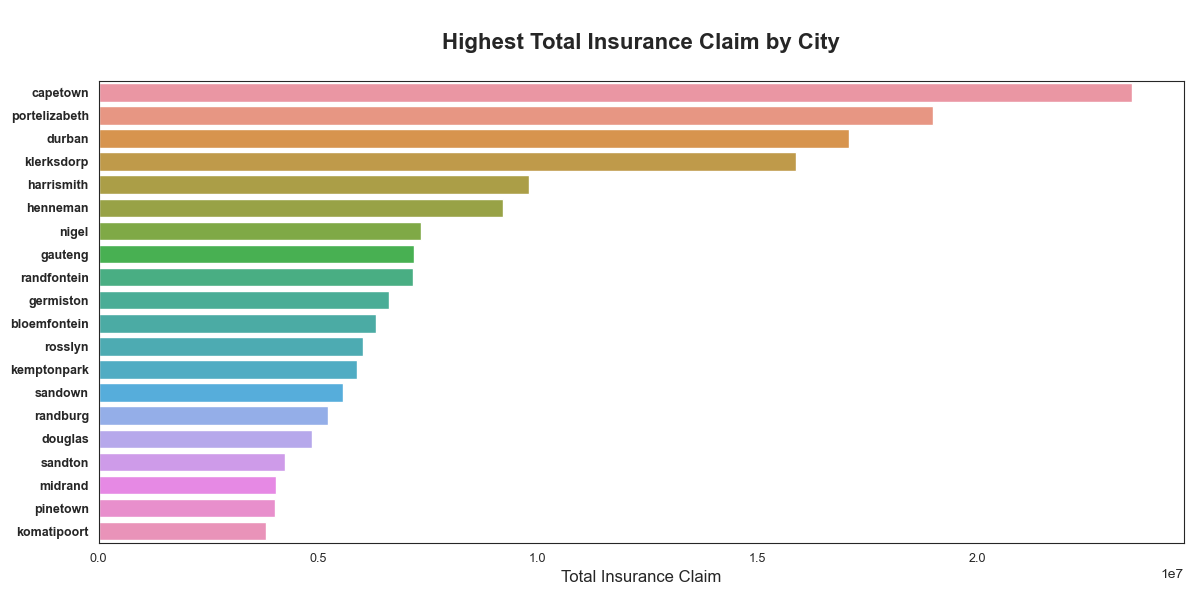

In [32]:
# Highest Insurance claim by Cities

plt.figure(figsize=(14, 6))
sns.barplot(data = city_df.sort_values('total_claims_of_city', ascending=False).head(20), x = 'total_claims_of_city', y = 'city', orient = 'h')
plt.title('\nHighest Total Insurance Claim by City\n', weight = 'bold', fontsize = 16)
plt.xlabel('Total Insurance Claim', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The city with the highest Total Insurance Claim is Capetown

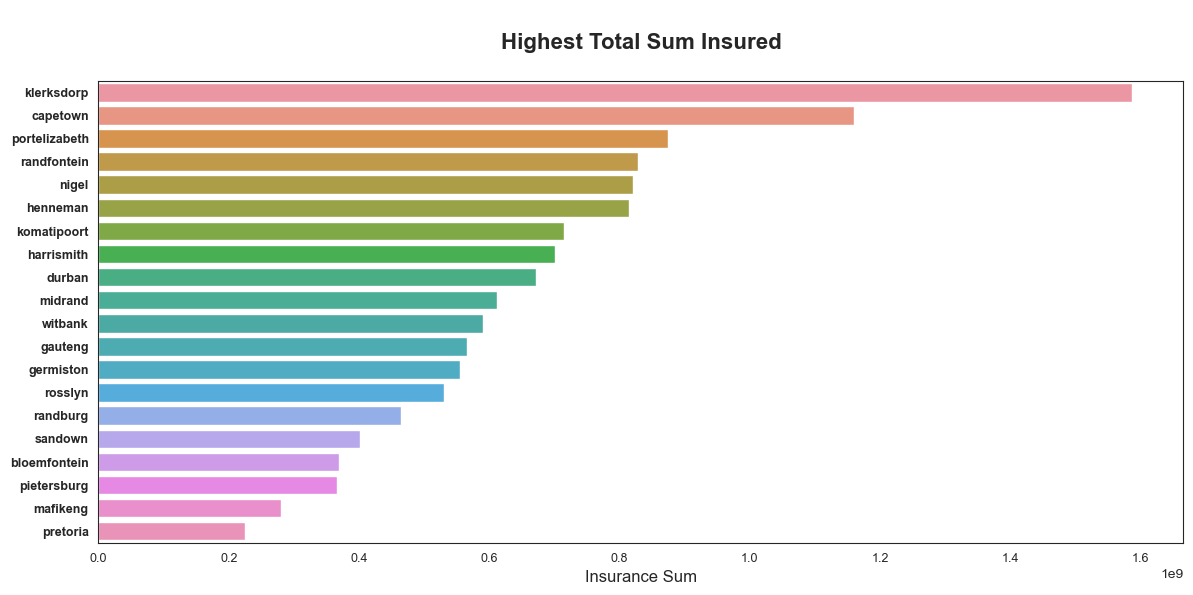

In [33]:
# Total Sum Insured

plt.figure(figsize=(14, 6))
sns.barplot(data = city_df.sort_values('total_sum_insured', ascending=False).head(20), x = 'total_sum_insured', y = 'city', orient = 'h')
plt.title('\nHighest Total Sum Insured\n', weight = 'bold', fontsize = 16)
plt.xlabel('Insurance Sum', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The city with the highest insured sum is Klerksdorp

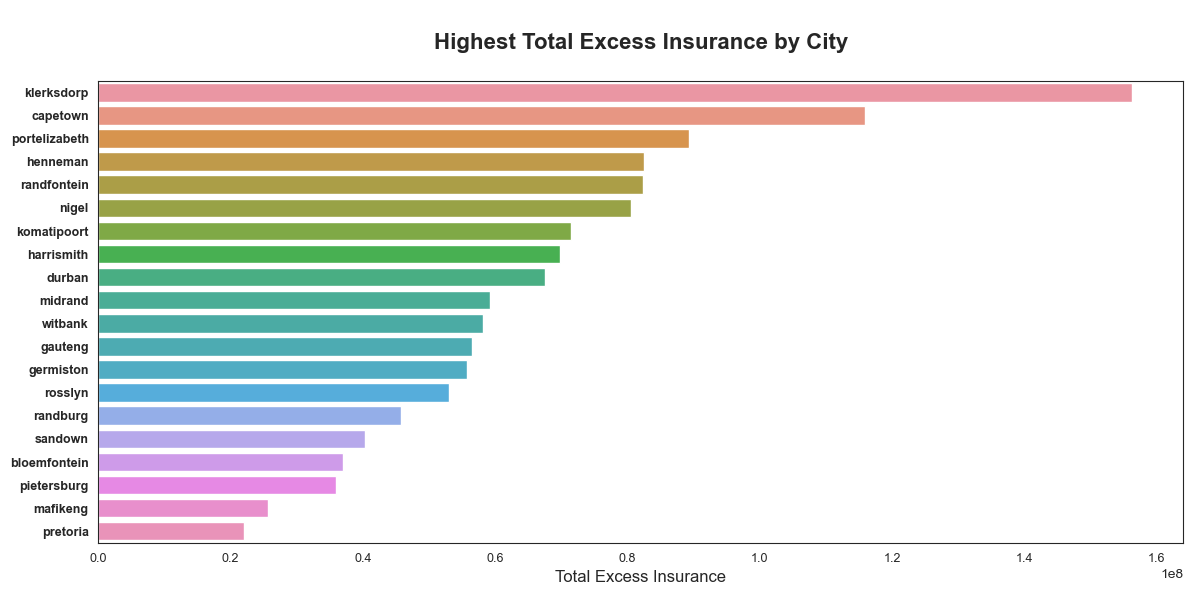

In [34]:
# Total Sum Insured

plt.figure(figsize=(14, 6))
sns.barplot(data = city_df.sort_values('total_excess_insurance', ascending=False).head(20), x = 'total_excess_insurance', y = 'city', orient = 'h')
plt.title('\nHighest Total Excess Insurance by City\n', weight = 'bold', fontsize = 16)
plt.xlabel('Total Excess Insurance', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The city with the highest total excess is Klerksdorp

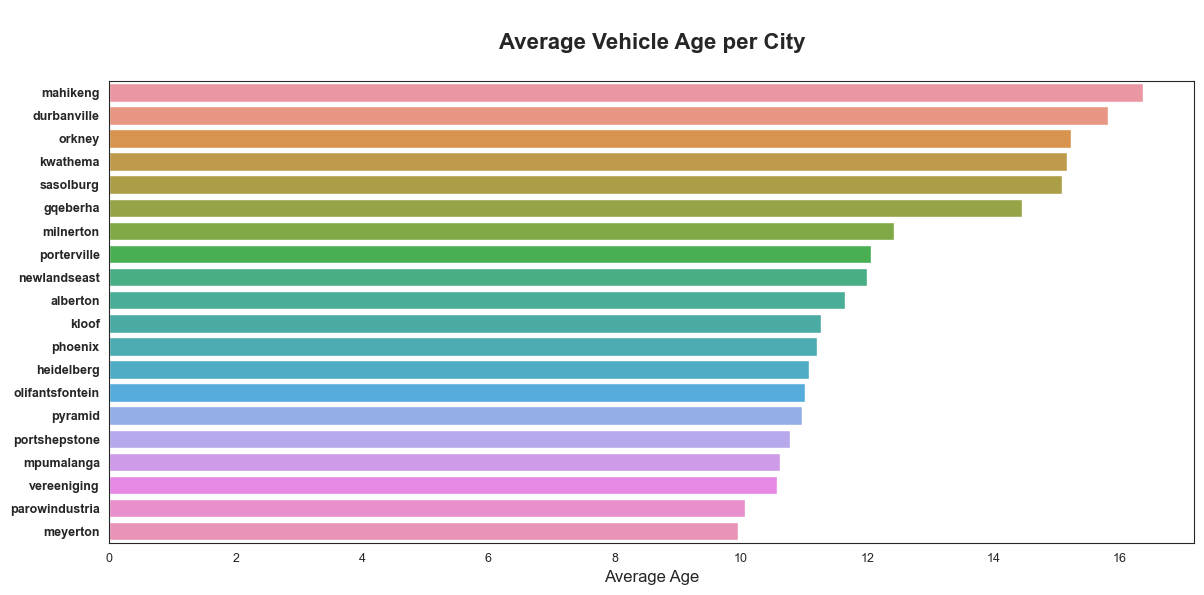

In [35]:
# Average Vehicle Age for each city

plt.figure(figsize=(14, 6))
sns.barplot(data = city_df.sort_values('average_vehicle_age', ascending=False).head(20), x = 'average_vehicle_age', y = 'city', orient = 'h')
plt.title('\nAverage Vehicle Age per City\n', weight = 'bold', fontsize = 16)
plt.xlabel('Average Age', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The city with the highest average age of vehicle is Mahikeng

In [36]:
# get a dataframe grouped by vehicle type

vehicle_df = data.groupby('vehicle_type').agg(total_claims_per_vehicle=('annual_claims', 'sum'),
                                   num_reg_vehicles=('annual_claims', 'count',),
                                   total_sum_insured=('sum_insured', 'sum'),
                                   total_excess_insurance=('excess', 'sum'),
                                   average_vehicle_age=('vehicle_age', 'mean')
                                   )

vehicle_df = vehicle_df.reset_index()
vehicle_df

,vehicle_type,total_claims_per_vehicle,num_reg_vehicles,total_sum_insured,total_excess_insurance,average_vehicle_age
0,bus,0.000000e+00,14,4.635500e+06,5.235500e+05,24.071429
1,caravans,0.000000e+00,13,2.575000e+06,4.160000e+05,16.846154
2,earthmovingtractors,1.891304e+05,3,7.500000e+05,1.500000e+05,8.000000
3,forklifttrucksandtrolleys,0.000000e+00,5,2.612750e+06,2.700000e+05,7.400000
4,ldv(commercialuse),9.773348e+04,14,1.880000e+06,9.400000e+04,9.214286
5,ldvs>1500kgs,3.705346e+04,8,1.984718e+06,9.923590e+04,9.625000
6,motorcycles,0.000000e+00,4,1.134684e+06,5.673420e+04,8.000000
7,motorcycles-126ccto250cc,0.000000e+00,2,2.813000e+05,6.000000e+04,0.500000
8,motorcycles-751ccto1000cc,0.000000e+00,2,9.145990e+05,1.039599e+05,0.000000
9,private/ldv,3.074350e+06,1116,4.669606e+08,2.336525e+07,6.241039


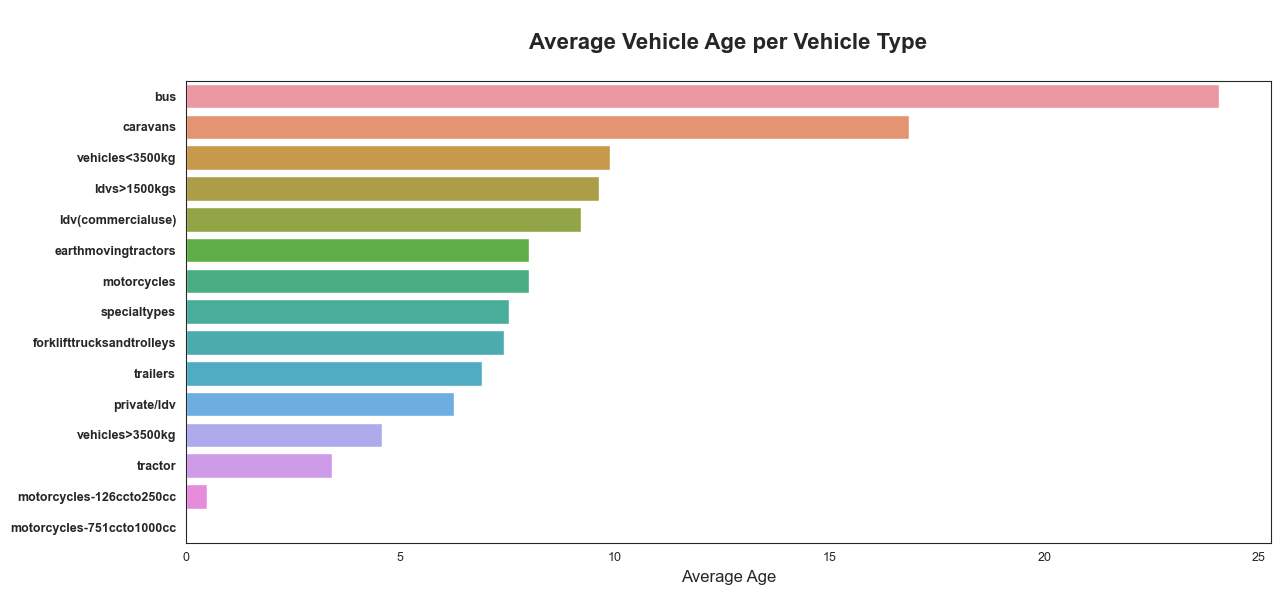

In [37]:
# Average Vehicle Age for each Vehicle type

plt.figure(figsize=(14, 6))
sns.barplot(data = vehicle_df.sort_values('average_vehicle_age', ascending=False), x = 'average_vehicle_age', y = 'vehicle_type', orient = 'h')
plt.title('\nAverage Vehicle Age per Vehicle Type\n', weight = 'bold', fontsize = 16)
plt.xlabel('Average Age', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- There are 15 vehicle types in the dataset
- The vehicle type with the highest Average Bus 

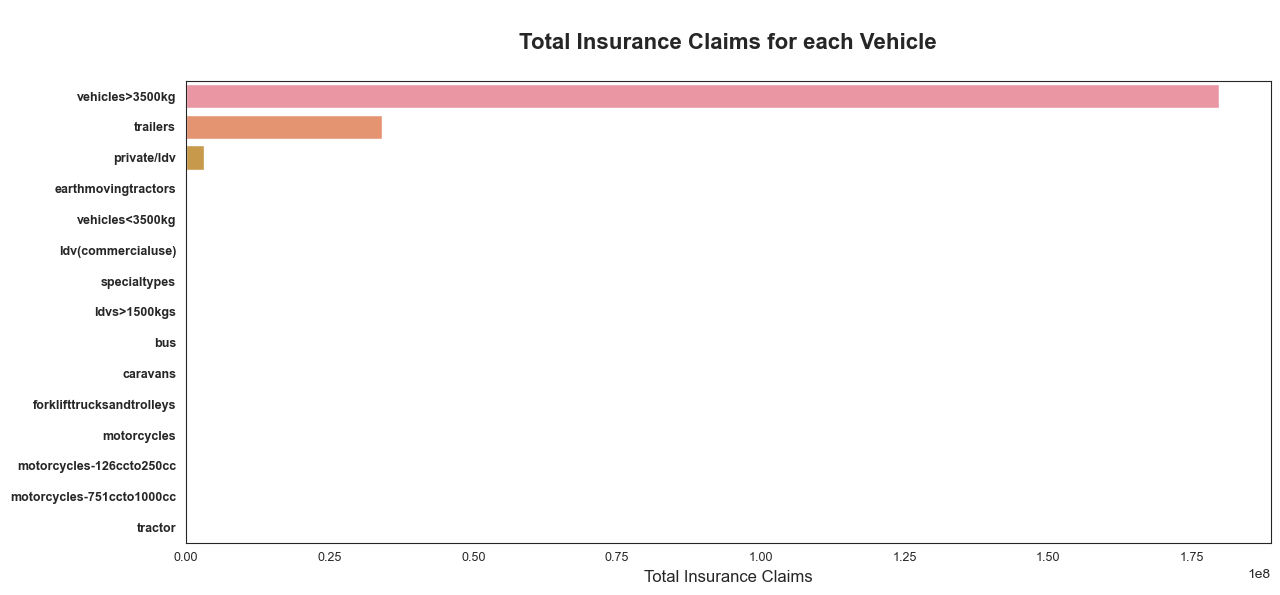

In [38]:
# Total Insurance Claims for each Vehicle Type

plt.figure(figsize=(14, 6))
sns.barplot(data = vehicle_df.sort_values('total_claims_per_vehicle', ascending=False), x = 'total_claims_per_vehicle', y = 'vehicle_type', orient = 'h')
plt.title('\nTotal Insurance Claims for each Vehicle\n', weight = 'bold', fontsize = 16)
plt.xlabel('Total Insurance Claims', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The vehicle type with the highest total insurance claim

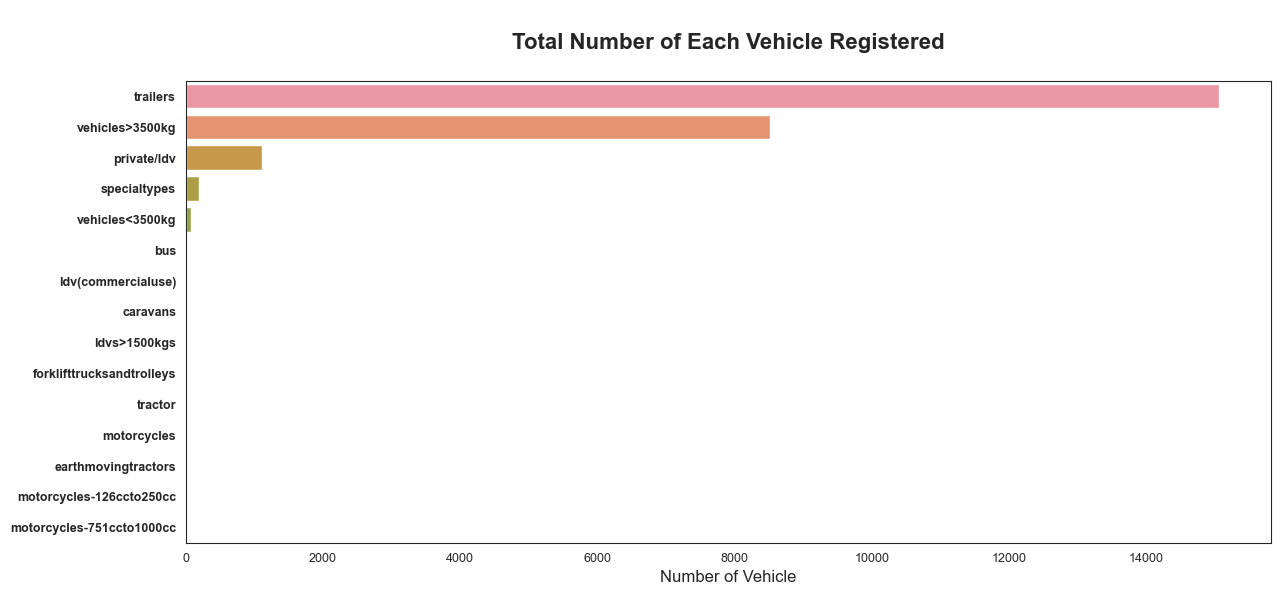

In [39]:
# Total Registered Vehicle Type

plt.figure(figsize=(14, 6))
sns.barplot(data = vehicle_df.sort_values('num_reg_vehicles', ascending=False), x = 'num_reg_vehicles', y = 'vehicle_type', orient = 'h')
plt.title('\nTotal Number of Each Vehicle Registered\n', weight = 'bold', fontsize = 16)
plt.xlabel('Number of Vehicle', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The most registered vehicle type in the data set is Trailers

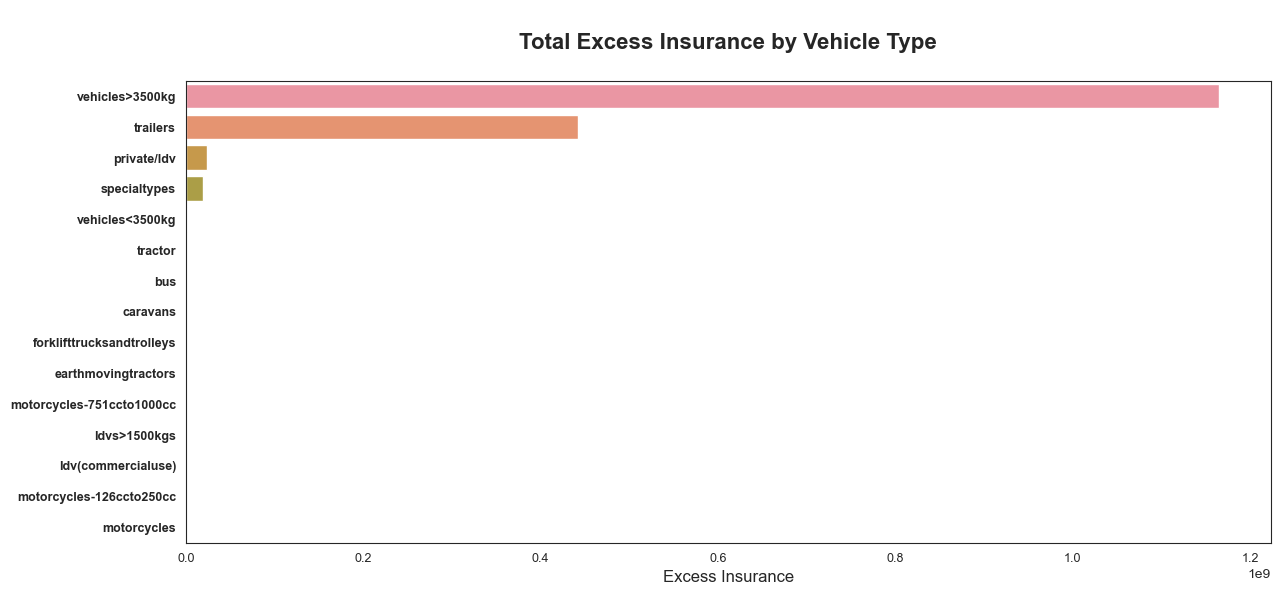

In [40]:
# Total Excess Insurance for Each Vehicle Type

plt.figure(figsize=(14, 6))
sns.barplot(data = vehicle_df.sort_values('total_excess_insurance', ascending=False), x = 'total_excess_insurance', y = 'vehicle_type', orient = 'h')
plt.title('\nTotal Excess Insurance by Vehicle Type\n', weight = 'bold', fontsize = 16)
plt.xlabel('Excess Insurance', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The club with the highest excess insurance is Vehicles that weighs above 3500kg

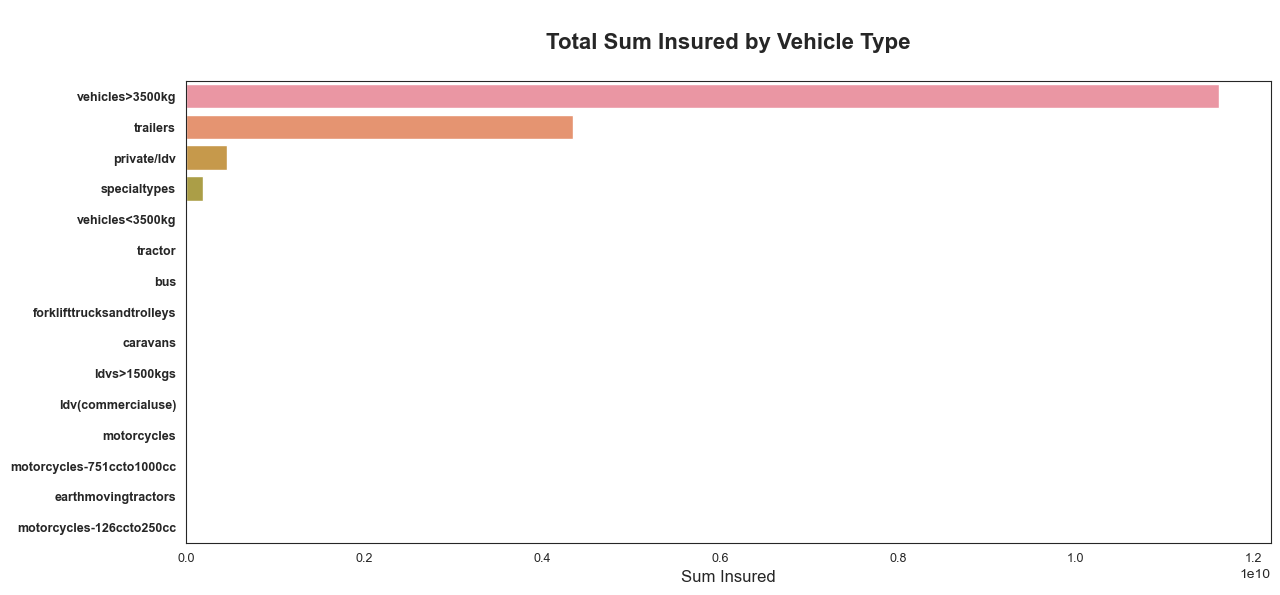

In [41]:
# Total Sum Insured

plt.figure(figsize=(14, 6))
sns.barplot(data = vehicle_df.sort_values('total_sum_insured', ascending=False), x = 'total_sum_insured', y = 'vehicle_type', orient = 'h')
plt.title('\nTotal Sum Insured by Vehicle Type\n', weight = 'bold', fontsize = 16)
plt.xlabel('Sum Insured', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

**Observation**
- The type of Vehicle with the highest sum insured are Vehicles>3500kg

<a id="four"></a>

# Preprocessing

[Back to Table of Contents](#table-of-contents)

In [42]:
# visualize the first 5 rows of the data

data.head()

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims
0,KDY034NW,2019,4,trailers,klerksdorp,325000.0,32500.0,0.250000,0.00
1,JZX224MP,2020,0,private/ldv,witbank,417058.0,20852.9,0.250000,0.00
2,HPP748EC,2015,6,trailers,portelizabeth,150000.0,15000.0,1.000000,66548.58
4,KPD308NW,2021,2,trailers,klerksdorp,495363.0,49536.3,0.166666,0.00
5,KF90HYGP,2021,0,trailers,nigel,456974.0,45697.4,0.333333,0.00


In [43]:
# create a function that convert the data types to the right format

def con_dtypes(df):
    df['vehicle_type'] = df['vehicle_type'].astype('category')
    df['city'] = df['city'].astype('category')
    df['vehicle_year'] = df['vehicle_year'].astype(int)
    return df


In [44]:
# convert the data types to the right variables

data = con_dtypes(data)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25019 entries, 0 to 25517
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   vehicle_regno  25019 non-null  object  
 1   vehicle_year   25019 non-null  int32   
 2   vehicle_age    25019 non-null  int64   
 3   vehicle_type   25019 non-null  category
 4   city           25019 non-null  category
 5   sum_insured    25019 non-null  float64 
 6   excess         25019 non-null  float64 
 7   exposure       25019 non-null  float64 
 8   annual_claims  25019 non-null  float64 
dtypes: category(2), float64(4), int32(1), int64(1), object(1)
memory usage: 1.5+ MB


**Loss Suffered:**
- The loss suffered can be calculated as the difference between the "sum_insured" and the "excess" amount.

In [45]:
data['loss_suffered'] = data['sum_insured'] - data['excess']

**Location Risk Index:**
- Calculate a risk index for each city based on the average annual claims in that city. This can help account for regional variations in claims.

In [46]:
location_risk = data.groupby('city')['annual_claims'].mean().reset_index()
location_risk.rename(columns={'annual_claims': 'location_risk_index'}, inplace=True)
data = data.merge(location_risk, on='city', how='left')

In [47]:
data.head()

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims,loss_suffered,location_risk_index
0,KDY034NW,2019,4,trailers,klerksdorp,325000.0,32500.0,0.250000,0.00,292500.0,8662.447185
1,JZX224MP,2020,0,private/ldv,witbank,417058.0,20852.9,0.250000,0.00,396205.1,1688.681546
2,HPP748EC,2015,6,trailers,portelizabeth,150000.0,15000.0,1.000000,66548.58,135000.0,9480.434853
3,KPD308NW,2021,2,trailers,klerksdorp,495363.0,49536.3,0.166666,0.00,445826.7,8662.447185
4,KF90HYGP,2021,0,trailers,nigel,456974.0,45697.4,0.333333,0.00,411276.6,6510.021154


**Policyholder's Vehicle Type Count:**
- Count the number of vehicles of the same type in the same city to capture competition or concentration of similar vehicles in a location.

In [48]:
data['vehicle_type_count'] = data.groupby(['city', 'vehicle_type'])['vehicle_regno'].transform('count')

**Claim Frequency:**
- Calculate the claim frequency for each policyholder as the ratio of the number of claims to the exposure.

In [49]:
data['claim_frequency'] = data['annual_claims'] / data['exposure']

**Claim Severity:**
- Create a feature that represents the severity of each claim by dividing the "loss_suffered" by the number of claims.

In [50]:
data['claim_severity'] = data['loss_suffered'] / (data['annual_claims'] + 1)  # Adding 1 to avoid division by zero

**Yearly Premium:**
- The yearly premium can be calculated as the ratio of the "loss_suffered" to the "exposure." It represents the annual cost of insurance for each policy

In [51]:
data['yearly_premium'] = data['loss_suffered'] / data['exposure']

**Yearly Premium per Vehicle Age:**
- Calculate a feature that considers the relationship between the yearly premium and the age of the insured vehicle.

In [52]:
data['premium_per_vehicle_age'] = data['yearly_premium'] / (data['vehicle_age'] + 1)  # Adding 1 to avoid division by zero

In [53]:
# view the data on a final note beofore the next phase of feature selection and principle components analysis

data.head()

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
0,KDY034NW,2019,4,trailers,klerksdorp,325000.0,32500.0,0.250000,0.00,292500.0,8662.447185,1041,0.00,292500.000000,1.170000e+06,2.340000e+05
1,JZX224MP,2020,0,private/ldv,witbank,417058.0,20852.9,0.250000,0.00,396205.1,1688.681546,52,0.00,396205.100000,1.584820e+06,1.584820e+06
2,HPP748EC,2015,6,trailers,portelizabeth,150000.0,15000.0,1.000000,66548.58,135000.0,9480.434853,1446,66548.58,2.028563,1.350000e+05,1.928571e+04
3,KPD308NW,2021,2,trailers,klerksdorp,495363.0,49536.3,0.166666,0.00,445826.7,8662.447185,1041,0.00,445826.700000,2.674971e+06,8.916570e+05
4,KF90HYGP,2021,0,trailers,nigel,456974.0,45697.4,0.333333,0.00,411276.6,6510.021154,749,0.00,411276.600000,1.233831e+06,1.233831e+06


In [54]:
data.columns

Index(['vehicle_regno', 'vehicle_year', 'vehicle_age', 'vehicle_type', 'city',
       'sum_insured', 'excess', 'exposure', 'annual_claims', 'loss_suffered',
       'location_risk_index', 'vehicle_type_count', 'claim_frequency',
       'claim_severity', 'yearly_premium', 'premium_per_vehicle_age'],
      dtype='object')

In [55]:
data.shape

(25019, 16)

<a id="five"></a>

# Feature Engineering/Selection

[Back to Table of Contents](#table-of-contents)

In [56]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

In [57]:
# Split the data back to the training and testing data set

train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 0)

# print the dimension of the data
print(f'The cleaned training data has the following dimension: {train_data.shape}')
print(f'The cleaned test data has the following dimension: {test_data.shape}')

The cleaned training data has the following dimension: (20015, 16)
The cleaned test data has the following dimension: (5004, 16)


#### Observation
- The OneHotEncoding performed with the pd.get_dummies() method increased the number of features tremendously

**CatBoostEncoding is condered for the following reasons:**

- A CatBoost encoder is similar to target encoding, but also involves an ordering principle in order to overcome this problem of target leakage. It uses the principle similar to the time series data validation. The values of target statistic rely on the observed history, i.e, target probability for the current feature is calculated only from the rows (observations) before it. Categorical feature values are encoded using the following formula:

Targetsum + prior / featurecount + 1


In [58]:
train_data.head()

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
23578,JP26NMGP,2011,10,vehicles>3500kg,randfontein,350000.0,35000.0,0.083333,0.0,315000.0,5513.540139,410,0.0,315000.0,3.780015e+06,3.436377e+05
18343,DT61PDGP,2014,9,trailers,rosslyn,312500.0,31250.0,0.250000,0.0,281250.0,6214.202116,607,0.0,281250.0,1.125000e+06,1.125000e+05
6045,TBA8432,2022,0,private/ldv,pinetown,250000.0,12500.0,0.666666,0.0,237500.0,20032.201950,53,0.0,237500.0,3.562504e+05,3.562504e+05
8966,HSL298FS,2021,1,vehicles>3500kg,komatipoort,1750000.0,175000.0,0.500000,0.0,1575000.0,3697.881535,269,0.0,1575000.0,3.150000e+06,1.575000e+06
13147,FV04VMGP,2013,8,vehicles>3500kg,centurion,350000.0,35000.0,0.083333,0.0,315000.0,6595.639689,139,0.0,315000.0,3.780015e+06,4.200017e+05


In [59]:
def encode_cat(data):
    '''
    This function takes the cleaned data set, encode the categorical features using the Catboostenconder()
    and return the data frame with encoded features and the selected target variable y
    '''
    # drop the annual_claims feature(the target varaible), and the vehicle registration number
    df = data.drop(['vehicle_regno', 'annual_claims'], axis = 1)
    # Assign the response variable to y which is conventional
    y = data['annual_claims']
    # initialize the encoder
    import category_encoders as ce
    encoder = ce.cat_boost.CatBoostEncoder()
    # select the features for encoding
    variable_for_encoding = df[['vehicle_type', 'city']]
    # apply encoding
    encoded_features = encoder.fit_transform(variable_for_encoding, y)
    # assign the encoded values to the original data frame
    df[['vehicle_type', 'city']] = encoded_features
    # return the final data frame with the encoded categorical variable
    return (df, y)

In [60]:
# perfom the encoding using the function above
df_final, y = encode_cat(train_data)

In [61]:
df_final.head()

,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
23578,2011,10,8503.027143,8503.027143,350000.0,35000.0,0.083333,315000.0,5513.540139,410,0.0,315000.0,3.780015e+06,3.436377e+05
18343,2014,9,8503.027143,8503.027143,312500.0,31250.0,0.250000,281250.0,6214.202116,607,0.0,281250.0,1.125000e+06,1.125000e+05
6045,2022,0,8503.027143,8503.027143,250000.0,12500.0,0.666666,237500.0,20032.201950,53,0.0,237500.0,3.562504e+05,3.562504e+05
8966,2021,1,4251.513572,8503.027143,1750000.0,175000.0,0.500000,1575000.0,3697.881535,269,0.0,1575000.0,3.150000e+06,1.575000e+06
13147,2013,8,2834.342381,8503.027143,350000.0,35000.0,0.083333,315000.0,6595.639689,139,0.0,315000.0,3.780015e+06,4.200017e+05


In [62]:
print(f'Total number of columns for the final data is: {df_final.shape[1]}')
print(f'Total number of rows for the final data is: {df_final.shape[0]}')

Total number of columns for the final data is: 14
Total number of rows for the final data is: 20015


In [63]:
# encode the categorical data set on the test data set

test_data_X, test_data_y = encode_cat(test_data)

In [64]:
test_data_X.shape

(5004, 14)

In [65]:
test_data_X.head()

,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
556,2016,5,9453.446721,9453.446721,1.985000e+05,19850.0,1.000000,1.786500e+05,6813.265374,576,138341.42,1.291361e+00,1.786500e+05,2.977500e+04
24300,2022,0,9453.446721,9453.446721,2.323000e+06,232300.0,0.583333,2.090700e+06,9480.434853,553,0.00,2.090700e+06,3.584059e+06,3.584059e+06
10367,2021,1,73897.433360,4726.723360,4.312500e+05,43125.0,1.000000,3.881250e+05,9480.434853,1446,0.00,3.881250e+05,3.881250e+05,1.940625e+05
12987,2019,2,49264.955574,9453.446721,3.662750e+05,36627.5,1.000000,3.296475e+05,6510.021154,749,0.00,3.296475e+05,3.296475e+05,1.098825e+05
24077,2004,17,4726.723360,9453.446721,2.104167e+05,30000.0,1.000000,1.804167e+05,13055.148005,496,0.00,1.804167e+05,1.804167e+05,1.002315e+04


**Principle Component Analysis**

In [66]:
# assign the independence variables X

X = df_final

In [67]:
print(f'The number of columns is: {X.shape[1]}')
print(f'The number of rows is: {X.shape[0]}')

The number of columns is: 14
The number of rows is: 20015


In [68]:
X.columns

Index(['vehicle_year', 'vehicle_age', 'vehicle_type', 'city', 'sum_insured',
       'excess', 'exposure', 'loss_suffered', 'location_risk_index',
       'vehicle_type_count', 'claim_frequency', 'claim_severity',
       'yearly_premium', 'premium_per_vehicle_age'],
      dtype='object')

**Apply Standard Scaler to scale both the train data and the testing data**

In [69]:
# scale the features to have a mean of 0 and a standard deviation of 1: 
'''
this will help contain the outliers and make the dataset maintain the relationship btw data points
'''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create a new DataFrame with standardized data and original feature names
X_stand = pd.DataFrame(X_scaled, columns=X.columns)
X_stand.head()

,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
0,-0.839910,0.667512,0.031543,0.03395,-0.459372,-0.454152,-1.279746,-0.459666,-0.425540,-0.161493,-0.078806,-0.359505,0.521247,-0.232874
1,-0.336382,0.497472,0.031543,0.03395,-0.513871,-0.508914,-0.775331,-0.514102,-0.331238,0.380306,-0.078806,-0.415267,-0.286474,-0.326280
2,1.006361,-1.032893,0.031543,0.03395,-0.604703,-0.782728,0.485699,-0.584668,1.528533,-1.143332,-0.078806,-0.487552,-0.520347,-0.227778
3,0.838518,-0.862853,-0.497164,0.03395,1.575259,1.590322,-0.018712,1.572626,-0.669910,-0.549278,-0.078806,1.722283,0.329581,0.264735
4,-0.504225,0.327431,-0.673399,0.03395,-0.459372,-0.454152,-1.279746,-0.459666,-0.279900,-0.906810,-0.078806,-0.359505,0.521247,-0.202015


In [70]:
# scale the features as done above for the test data as well: 

scaler = StandardScaler()
test_data_X_scaled = scaler.fit_transform(test_data_X)

# Create a new DataFrame with standardized data and original feature names
test_data_X_scaled = pd.DataFrame(test_data_X_scaled, columns=X.columns)
test_data_X_scaled.head()

,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
0,0.018708,-0.196860,-0.114979,-0.058984,-0.689345,-0.687713,1.509249,-0.689116,-0.228251,0.298641,0.482637,-0.894553,-0.595733,-0.356757
1,0.988797,-1.015312,-0.114979,-0.058984,2.457005,2.476805,0.242045,2.453361,0.083754,0.236183,-0.078264,2.597195,0.481162,1.093499
2,0.827115,-0.851622,5.277953,-0.327467,-0.344646,-0.341024,1.509249,-0.344841,0.083754,2.661173,-0.078264,-0.246334,-0.529491,-0.289723
3,0.503752,-0.687931,3.216608,-0.058984,-0.440873,-0.437806,1.509249,-0.440950,-0.263725,0.768432,-0.078264,-0.344000,-0.547983,-0.324071
4,-1.921471,1.767424,-0.510531,-0.058984,-0.671697,-0.536525,1.509249,-0.686213,0.501924,0.081397,-0.078264,-0.593235,-0.595175,-0.364816


In [71]:
# Create a PCA object
pca = PCA(n_components=None)  # Use None to retain all components

# Fit PCA to the scaled data
pca.fit(X_stand)

# Transform the data to the first N principal components
X_pca = pca.fit_transform(X_stand)

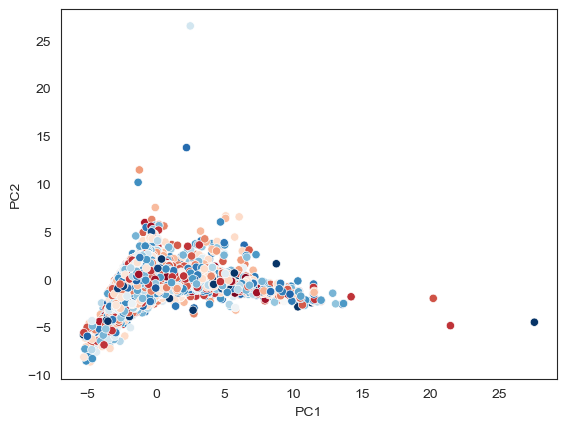

In [72]:
# create a data frame with the pca data as:
# Create feature names for the selected components
feature_names = [f"PC{i+1}" for i in range(14)]

# Create a new DataFrame with the transformed data and feature names
pca_df = pd.DataFrame(data=X_pca, columns=feature_names)

pca_df['city'] = data['city']

# Lets visualize the first 2 pricipal components of the data
 
ax = sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'],
                     hue="city",
                     palette='RdBu',
                     data=pca_df,
                     legend=False)
plt.show()


In [73]:
# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the first 10 principal components in order of magnitude
print(explained_variance_ratio[:10])

# print the % of variance covered by the first 10 features
print(f"The % variance covered by the first 10 principal components are: {np.sum(explained_variance_ratio[:10]) * 100}")

# Cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()

[0.42751095 0.12038424 0.10828665 0.08992784 0.07243419 0.0622418
 0.04132684 0.03449537 0.02452081 0.01043328]
The % variance covered by the first 10 principal components are: 99.15619719761943


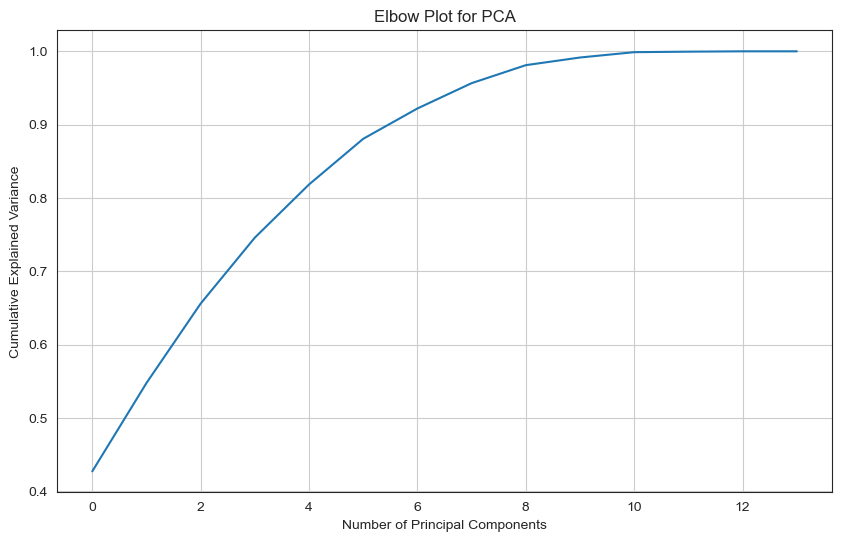

In [74]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.grid(True)
plt.show()

In [75]:
# Check the number of components that will explain 99% of the data set

pca_ = PCA(0.99)
pca_.fit_transform(X_stand)
print(round(pca_.explained_variance_ratio_.sum()*100, 1),
      "% of variance is explained by",
      pca_.n_components_,
      "components.")

99.2 % of variance is explained by 10 components.


In [76]:
# Since 10 features explained 99% of the variance, lets set the number of components to 109 and reduce the features
num_components = 10
pca_f = PCA(n_components=num_components)

X_final = pca_f.fit_transform(X_stand)
# print the variance explained ratio
print(f"{num_components} principal components accounts for total of {round((pca_f.explained_variance_ratio_.sum() * 100),0)}% variance of the data")

10 principal components accounts for total of 99.0% variance of the data


In [77]:
# split the data into training and test set

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=0)

In [78]:
X_train_pca.shape

(16012, 10)

In [79]:
X_test_pca.shape

(4003, 10)

#### PCA for test data

In [80]:
# PCA for unseen data
# Since 10 features explained 99% of the variance, lets set the number of components to 10 and reduce the features
num_components = 10
pca_f = PCA(n_components=num_components)

test_data_X_pca = pca_f.fit_transform(test_data_X_scaled)
test_data_X_pca.shape

(5004, 10)

In [81]:
test_data_X_scaled.head()

,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
0,0.018708,-0.196860,-0.114979,-0.058984,-0.689345,-0.687713,1.509249,-0.689116,-0.228251,0.298641,0.482637,-0.894553,-0.595733,-0.356757
1,0.988797,-1.015312,-0.114979,-0.058984,2.457005,2.476805,0.242045,2.453361,0.083754,0.236183,-0.078264,2.597195,0.481162,1.093499
2,0.827115,-0.851622,5.277953,-0.327467,-0.344646,-0.341024,1.509249,-0.344841,0.083754,2.661173,-0.078264,-0.246334,-0.529491,-0.289723
3,0.503752,-0.687931,3.216608,-0.058984,-0.440873,-0.437806,1.509249,-0.440950,-0.263725,0.768432,-0.078264,-0.344000,-0.547983,-0.324071
4,-1.921471,1.767424,-0.510531,-0.058984,-0.671697,-0.536525,1.509249,-0.686213,0.501924,0.081397,-0.078264,-0.593235,-0.595175,-0.364816


<a id="six"></a>

# Model and Model Evaluation

[Back to Table of Contents](#table-of-contents)

#### Base Model


In [82]:
# importing model dependency

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Tweedie
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

#### List of preprocessed data

- X_stand, y which is the full train set
  
- X_train_pca, X_test_pca, y_train, y_test


- test_data_X_scaled & test_data_y

- test_data_X_pca

In [83]:
# Let's prepare the independent variable for training the model

X_sm = sm.add_constant(X_stand)

In [84]:
X_sm.head()

,const,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
0,1.0,-0.839910,0.667512,0.031543,0.03395,-0.459372,-0.454152,-1.279746,-0.459666,-0.425540,-0.161493,-0.078806,-0.359505,0.521247,-0.232874
1,1.0,-0.336382,0.497472,0.031543,0.03395,-0.513871,-0.508914,-0.775331,-0.514102,-0.331238,0.380306,-0.078806,-0.415267,-0.286474,-0.326280
2,1.0,1.006361,-1.032893,0.031543,0.03395,-0.604703,-0.782728,0.485699,-0.584668,1.528533,-1.143332,-0.078806,-0.487552,-0.520347,-0.227778
3,1.0,0.838518,-0.862853,-0.497164,0.03395,1.575259,1.590322,-0.018712,1.572626,-0.669910,-0.549278,-0.078806,1.722283,0.329581,0.264735
4,1.0,-0.504225,0.327431,-0.673399,0.03395,-0.459372,-0.454152,-1.279746,-0.459666,-0.279900,-0.906810,-0.078806,-0.359505,0.521247,-0.202015


In [85]:
# divide the data into train and validation data

X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_sm, y, test_size=0.2, random_state=20)

In [86]:
# print the dimensions to confirm values match
X_train_sm.shape

(16012, 15)

In [87]:
# reshape the target variable into matrix

y_train_sm_reshaped = y_train_sm.values.reshape(-1,1)

In [88]:
X_val_sm.shape

(4003, 15)

In [89]:
y_val_sm_reshaped = y_val_sm.values.reshape(-1, 1)

In [90]:
# Create a TweedieGLM model
base_model = GLM(y_train_sm_reshaped, X_train_sm, family=Tweedie())

# Fit the TweedieGLM model
model_results = base_model.fit()

# Display the model summary
print(model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                16012
Model:                            GLM   Df Residuals:                    15998
Model Family:                 Tweedie   Df Model:                           13
Link Function:                    Log   Scale:                          51715.
Method:                          IRLS   Log-Likelihood:                -2571.2
Date:                Wed, 22 Nov 2023   Deviance:                   2.6593e+08
Time:                        13:36:31   Pearson chi2:                 8.27e+08
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6100
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Observation**

- The Pseudo R-squared (CS) value is approximately 0.508, indicating that the model explains around 50% of the variance in the target variable
- Some variables have coefficients with p-values less than 0.05, suggesting statistical significace
- The Log-Likelihood is negative, which is expected for a model like this
- Some coefficients are positive, and some are negative, which indicates the direction of the relationship with the target variable

variable.

In [91]:
# create a function to make predictions, evaluate model performance, and check for overfitting

def model_eval (model, X_test, y_test):
    '''
    This function takes the model, X_test which is the unseen data and the true y values,
    performs prediction with the model and then evaluates
    the performance using various metrics from the sklearn library
    '''
    y_pred = model.predict(X_test)
    r_sq = r2(y_test, y_pred)
    r_sq = round(r_sq * 100, 2)
    print(f'R2 is: {r_sq} %')
    mae_val = mae(y_test, y_pred)
    print(f'MAE is: {mae_val}')
    rmse_val = np.sqrt(mse(y_test, y_pred))
    print(f'RMSE is: {rmse_val}')
    print('-' * 30)
    

In [92]:
# evaluate the model performance using the function created above
print(f'Evaluation on training data')
model_eval(model_results, X_train_sm, y_train_sm_reshaped)

# evaluation on validation data
print(f'Evaluation on validation data')
model_eval(model_results, X_val_sm, y_val_sm_reshaped)

Evaluation on training data
R2 is: 18.23 %
MAE is: 9499.649907035237
RMSE is: 73656.11763996362
------------------------------
Evaluation on validation data
R2 is: 18.58 %
MAE is: 10913.781427220247
RMSE is: 77328.28237097606
------------------------------


In [93]:
# reshape the target variable

y_reshaped = y.values.reshape(-1,1)

In [94]:
# retrain on full trainset

base_model = GLM(y_reshaped, X_sm, family=Tweedie())

# Fit the TweedieGLM model
model_results = base_model.fit()

# Display the model summary
print(model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                20015
Model:                            GLM   Df Residuals:                    20001
Model Family:                 Tweedie   Df Model:                           13
Link Function:                    Log   Scale:                      1.2256e+06
Method:                          IRLS   Log-Likelihood:                -137.08
Date:                Wed, 22 Nov 2023   Deviance:                   3.3597e+08
Time:                        13:36:33   Pearson chi2:                 2.45e+10
No. Iterations:                   100   Pseudo R-squ. (CS):            0.04052
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [95]:
# model evaluation
print(f'Evaluation on training data')
model_eval(model_results, X_train_sm, y_train_sm_reshaped)

# evaluation on validation data
print(f'Evaluation on validation data')
model_eval(model_results, X_val_sm, y_val_sm_reshaped)

Evaluation on training data
R2 is: -4.83 %
MAE is: 9645.508545878349
RMSE is: 83396.81390452971
------------------------------
Evaluation on validation data
R2 is: 60.43 %
MAE is: 9845.78947856944
RMSE is: 53907.31287489788
------------------------------


**Observation**
- model performs better on the validation data compared to the training data. However,
- The metrics suggest that there may be room for improvement, especially regarding MAE and RMSE.
- explore different algorithms to enhance model performance

### Generalized Linear Model (GLM)

Tweedie GLMs are a specialized type of GLM used for modeling data with compound Poisson distribution, which includes many types of insurance and financial data. TweedieRegressor is used to implements a generalized linear model for the Tweedie distribution, that allows to model any of the following mentioned distributions using the appropriate power parameter. In particular:

- power = 0: Normal distribution. Specific estimators such as Ridge, ElasticNet are generally more appropriate in this case.

- power = 1: Poisson distribution. PoissonRegressor is exposed for convenience. However, it is strictly equivalent to TweedieRegressor(power=1, link='log').

- power = 2: Gamma distribution. GammaRegressor is exposed for convenience. However, it is strictly equivalent to TweedieRegressor(power=2, link='log').

- power = 3: Inverse Gaussian distribution.

The link function is determined by the link parameter

For this project, since our target variable is skewed to the 0, we would implement the Poison, Gamma, and the Inverse Gaussian distribution

### Model without PCA

In [96]:
# First build the model without PCA

X_stand.shape

(20015, 14)

In [97]:
list(y[:5])

[0.0, 0.0, 0.0, 0.0, 0.0]

In [98]:
# split the data into training and validation set setting the random_state=0 to capture the time factor

X_train, X_test, y_train, y_test = train_test_split(X_stand,
                                                       y,
                                                       test_size = 0.2,
                                                       random_state = 0)

In [99]:
X_train.shape

(16012, 14)

In [100]:
# Create a TweedieRegressor model with the power parameter (p) equal to 0 which is for a normal Tweedie distribution
normal_model = TweedieRegressor(power=0,)  # Power=0 equivalent to normal distribution

# Fit the model to your training data
normal_model.fit(X_train, y_train)

TweedieRegressor(power=0)

In [101]:
# check the score of the model both on testing and validation
print(f'The performance score on training is: {normal_model.score(X_train, y_train)}')
print(f'The performance score on test data is: {normal_model.score(X_test, y_test)}')

print('-' * 30)
# check the r2, mae, and rmse of the model on unseen data:
print(f'Trained model performance metrics')
model_eval(normal_model, X_train, y_train)

print(f'Model performance metrics on validation data')
model_eval(normal_model, X_test, y_test)

The performance score on training is: 0.5585496631064968
The performance score on test data is: 0.480922547681784
------------------------------
Trained model performance metrics
R2 is: 55.85 %
MAE is: 10520.737670438726
RMSE is: 57131.907074074705
------------------------------
Model performance metrics on validation data
R2 is: 48.09 %
MAE is: 9321.505616893726
RMSE is: 47270.13251341051
------------------------------


In [102]:
# Create a TweedieRegressor model with the power parameter (p) equal 1 which is for poison distribution
poisson_model = TweedieRegressor(power=1,)  # Power=1 equivalent to poisson distribution

# Fit the model to your training data
poisson_model.fit(X_train, y_train)

TweedieRegressor(power=1)

In [103]:
# check the score of the model both on testing and validation
print(f'The performance score on training is: {poisson_model.score(X_train, y_train)}')
print(f'The performance score on test data is: {poisson_model.score(X_test, y_test)}')

print('-' * 30)
# check the r2, mae, and rmse of the model on unseen data:
print(f'Trained model performance metrics')
model_eval(poisson_model, X_train, y_train)

print(f'Model performance metrics on validation data')
model_eval(poisson_model, X_test, y_test)

The performance score on training is: 0.8293872979932275
The performance score on test data is: 0.7600673602704374
------------------------------
Trained model performance metrics
R2 is: 40.07 %
MAE is: 8321.34054348898
RMSE is: 66564.61503634
------------------------------
Model performance metrics on validation data
R2 is: 52.57 %
MAE is: 7203.73237396734
RMSE is: 45185.1454570386
------------------------------


In [104]:
# Create a TweedieRegressor model with the power parameter (p) equal to 1.2 which is for compound-gamma distribution
com_gamma_model = TweedieRegressor(power=1.2,) 

# Fit the model to your training data
com_gamma_model.fit(X_train, y_train)

TweedieRegressor(power=1.2)

In [105]:
# check the score of the model both on testing and validation
print(f'The performance score on training is: {com_gamma_model.score(X_train, y_train)}')
print(f'The performance score on test data is: {com_gamma_model.score(X_test, y_test)}')

print('-' * 30)
# check the r2, mae, and rmse of the model on unseen data:
print(f'Trained model performance metrics')
model_eval(com_gamma_model, X_train, y_train)

print(f'Model performance metrics on validation data')
model_eval(com_gamma_model, X_test, y_test)

The performance score on training is: 0.8514629893488417
The performance score on test data is: 0.802924793195989
------------------------------
Trained model performance metrics
R2 is: -83.71 %
MAE is: 9173.272915533476
RMSE is: 116548.8568647821
------------------------------
Model performance metrics on validation data
R2 is: -18.46 %
MAE is: 8148.977788455126
RMSE is: 71409.99475525325
------------------------------


#### Applying logarithmic transformation on the target variable (annual Claim)

In [106]:
# take the log of the target variable by adding 1 to the values to avoid INF values when performing the log transformation
# and train the model to see if there would be any significant difference

log_y = np.log(y+1) # logarithm of the target variable

X_train_, X_test_, y_train_log, y_test_log = train_test_split(X_stand,
                                                       log_y,
                                                       test_size = 0.2,
                                                       random_state = 0)

tweedie_model = TweedieRegressor(power=1,)  # Power=1 equivalent to poisson distribution

# Fit the model to your training data
tweedie_model.fit(X_train_, y_train_log)

TweedieRegressor(power=1)

In [107]:
# check the score of the model both on testing and validation
print(f'The performance score on training is: {tweedie_model.score(X_train_, y_train_log)}')
print(f'The performance score on test data is: {tweedie_model.score(X_test_, y_test_log)}')

print('-' * 30)
# check the r2, mae, and rmse of the model on unseen data:
print(f'Trained model performance metrics')
model_eval(tweedie_model, X_train_, y_train_log)

print(f'Model performance metrics on validation data')
model_eval(tweedie_model, X_test_, y_test_log)

The performance score on training is: 0.3937350047822047
The performance score on test data is: 0.3614643402493083
------------------------------
Trained model performance metrics
R2 is: 22.61 %
MAE is: 1.0969423356527863
RMSE is: 2.3463101735095986
------------------------------
Model performance metrics on validation data
R2 is: -139.64 %
MAE is: 1.15884449827115
RMSE is: 4.126045941105082
------------------------------


In [108]:
# initialize the model
model = TweedieRegressor(power=0,)

# fit the model to the training data
model.fit(X_train_, y_train_log)

TweedieRegressor(power=0)

In [109]:
# check the score of the model both on testing and validation
print(f'The performance score on training is: {model.score(X_train_, y_train_log)}')
print(f'The performance score on test data is: {model.score(X_test_, y_test_log)}')

print('-' * 30)
# check the r2, mae, and rmse of the model on unseen data:
print(f'Trained model performance metrics')
model_eval(model, X_train_, y_train_log)

print(f'Model performance metrics on unseen data')
model_eval(model, X_test_, y_test_log)

The performance score on training is: 0.299541870850774
The performance score on test data is: 0.2883147519441118
------------------------------
Trained model performance metrics
R2 is: 29.95 %
MAE is: 1.1258790504127232
RMSE is: 2.232257434071363
------------------------------
Model performance metrics on unseen data
R2 is: 28.83 %
MAE is: 1.1355147963438992
RMSE is: 2.248537279472467
------------------------------


**Observation**
- The worst performing model are the model which target variable was log transform
- The best performing model is the first Tweedie model without log transformation and the power parameter is set to be 0 which is for a normal tweedie distribution

**Next**
- Use the features selected after pca to check the tradeoff between the model with PCA and that without PCA 
- Build on the tweedie model and perform cross validation with GridSearchCV to find best parameters for the model 

#### Model with data with which PCA was carried out

In [110]:
'''
NB: The algorithm which performed best was used to check the trade off between non pca and pca data
'''
model_pca = TweedieRegressor(power=0,)

# fit the model to the training data
model_pca.fit(X_train_pca, y_train)

TweedieRegressor(power=0)

In [111]:
# check the score of the model both on testing and validation
print(f'The performance score on training is: {model_pca.score(X_train_pca, y_train)}')
print(f'The performance score on test data is: {model_pca.score(X_test_pca, y_test)}')

print('-' * 30)
# check the r2, mae, and rmse of the model on unseen data:
print(f'Trained model performance metrics')
model_eval(model_pca, X_train_pca, y_train)

print(f'Model performance metrics on unseen data')
model_eval(model_pca, X_test_pca, y_test)

The performance score on training is: 0.5585377550487635
The performance score on test data is: 0.4809041293146902
------------------------------
Trained model performance metrics
R2 is: 55.85 %
MAE is: 10522.042189834407
RMSE is: 57132.67763126213
------------------------------
Model performance metrics on unseen data
R2 is: 48.09 %
MAE is: 9320.897469840966
RMSE is: 47270.97114637969
------------------------------


**Observation**
- Almost no difference was recorded

In [112]:
%%time
# lets perform cv to try and improve our model performance

param_grid = {
    'power': [0, 1, 1.2, 1.5],
    'alpha': [0.1, 0.5, 1.0, 2.0, 10.0, 1e-4, 1e-5, 1e-6],
    'solver': ['lbfgs', 'newton-cholesky']
}

tweedie_grid_search = GridSearchCV(normal_model, param_grid, cv=5, scoring='neg_mean_squared_error', )
tweedie_grid_search.fit(X_stand, y)
best_model = tweedie_grid_search.best_estimator_
tweedie_best_parameters = tweedie_grid_search.best_params_
print(f'Best parameters:\n {tweedie_best_parameters}')
print(f'Best score:\n {np.sqrt(-tweedie_grid_search.best_score_)}')

Best parameters:
 {'alpha': 0.0001, 'power': 0, 'solver': 'newton-cholesky'}
Best score:
 46087.09042241789
CPU times: total: 1min 41s
Wall time: 38.3 s


In [113]:
# check the score of the model both on testing and validation
print(f'The performance score on training is: {best_model.score(X_stand, y)}')
print(f'The performance score on test data is: {best_model.score(test_data_X, test_data_y)}')

print('-' * 30)
# check the r2, mae, and rmse of the model on unseen data:
print(f'Trained model performance metrics')
model_eval(best_model, X_stand, y)

print(f'Model performance metrics on unseen data')
model_eval(best_model, test_data_X, test_data_y)

The performance score on training is: 0.7069358908517638
The performance score on test data is: -39606703894.688385
------------------------------
Trained model performance metrics
R2 is: 70.69 %
MAE is: 7866.234581771994
RMSE is: 44564.65655433381
------------------------------
Model performance metrics on unseen data
R2 is: -3960670389468.84 %
MAE is: 4993761739.14591
RMSE is: 19644735221.63848
------------------------------


**The evaluation metrics used below where adopted based on the feedback we got from the progress report sessions and multiple research**

In [114]:
# train the glm based on the best parameters

glm_model = TweedieRegressor(alpha = 0.0001, power = 0, solver= 'newton-cholesky')

glm_model.fit(X_stand, y)

TweedieRegressor(alpha=0.0001, power=0, solver='newton-cholesky')

In [115]:
# make prediction with the trainset and calculate the mae for the train data
# predictions
glm_train_y_pred = glm_model.predict(X_stand)
glm_test_y_pred = glm_model.predict(test_data_X_scaled)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
glm_train_mae = round(mae(y, glm_train_y_pred),2)
print(f'Train GLM MAE: {glm_train_mae}')
glm_test_mae = round(mae(test_data_y, glm_test_y_pred),2)
print(f'Test GLM MAE: {glm_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
glm_train_rmse = round(np.sqrt(mse(y, glm_train_y_pred)),2)
print(f'Train GLM RMSE: {glm_train_rmse}')
glm_test_rmse = round(np.sqrt(mse(test_data_y, glm_test_y_pred)),2)
print(f'Test GLM RMSE: {glm_test_rmse}')


MAE Evaluation scores for training and validation
Train GLM MAE: 7866.23
Test GLM MAE: 8133.73
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train GLM RMSE: 44564.66
Test GLM RMSE: 51099.16


In [116]:
def plot_evaluation(y_true, y_pred):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Q-Q Plot
    residuals = y_true - y_pred
    sm.qqplot(residuals, line='s', ax=axes[0])
    axes[0].set_title('Q-Q Plot of Residuals')

    # Predicted vs. Actual Plot
    axes[1].scatter(y_true, y_pred)
    # axes[1].set_yscale('log')
    # axes[1].set_xscale('log')
    axes[1].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red')
    axes[1].set_xlabel('Actual Values')
    axes[1].set_ylabel('Predicted Values')
    axes[1].set_title('Predicted vs. Actual Plot')

    plt.show()

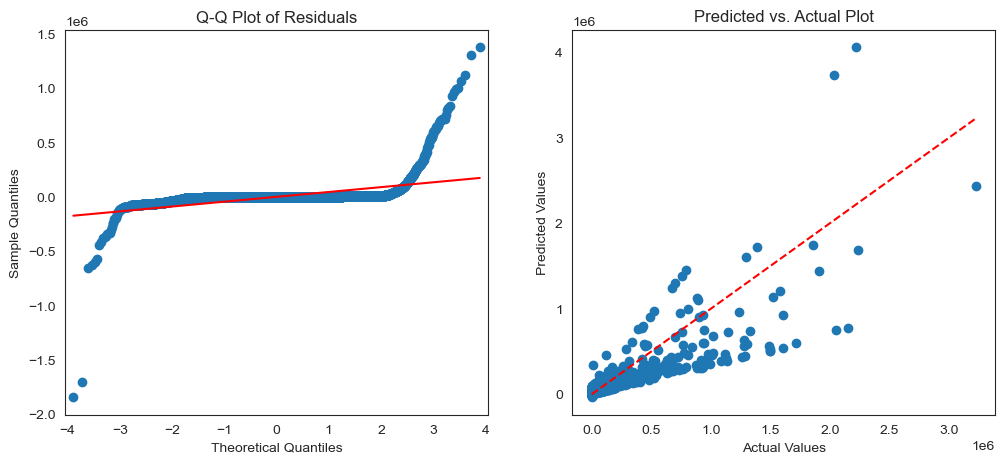

In [117]:
# use the plot function to evaluate the model performance

plot_evaluation(y, glm_train_y_pred)

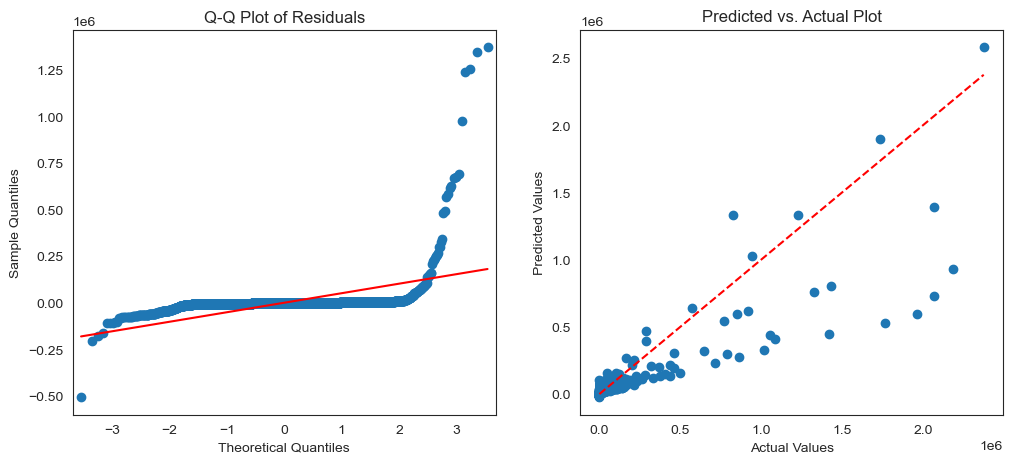

In [118]:
# evaluate the model on unseen data using the plot function

plot_evaluation(test_data_y, glm_test_y_pred)

**Observation**

On the training data:
- Mean Absolute Error (MAE) is approximately 7866, which means that, on average, the model's predictions on the training data are off by about 7866 units. The MAE value is relatively high, indicating a moderate level of error.
- Root Mean Squared Error (RMSE) is approximately 44564.65. RMSE measures the average magnitude of the model's errors, and this value is relatively high, indicating that the model's errors can be substantial.

On the test validation data:

- MAE is approximately 4993759365.44, indicating that, on average, the model's predictions on the test data are off by about 8133.73 units. Like the training MAE, this is a relatively high error.
- RMSE is approximately 19644734119.68 The RMSE on the test data is higher than on the training data, and it's also relatively high.

Conclusively, test other algorithm to see if we can get another model to perform better.

### Random Forest

In [119]:
%%time
# initialize the model

rfm = RandomForestRegressor(n_estimators=100, 
                            criterion='squared_error', max_depth=None, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0,
                            max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
                            oob_score=False, n_jobs=-1, random_state=None, verbose=0, warm_start=False,
                            ccp_alpha=0.0, max_samples=None,
                           )

# train the model by fit the rfm to the training data set as follows:
rfm.fit(X_train, y_train)

CPU times: total: 31.4 s
Wall time: 9.16 s


RandomForestRegressor(n_jobs=-1)

In [120]:
# evaluate the performance using the functions created earlier for evaluation

# check the score of the model both on testing and validation
print(f'The performance score on training is: {rfm.score(X_train, y_train)}')
print(f'The performance score on test data is: {rfm.score(X_test, y_test)}')

print('-' * 30)
# check the r2, mae, and rmse of the model on unseen data:
print(f'Trained model performance metrics')
model_eval(rfm, X_train, y_train)

print(f'Model performance metrics on validation data')
model_eval(rfm, X_test, y_test)

The performance score on training is: 0.9940432122826821
The performance score on test data is: 0.9805936312613254
------------------------------
Trained model performance metrics
R2 is: 99.4 %
MAE is: 403.83844252435705
RMSE is: 6636.572704846496
------------------------------
Model performance metrics on validation data
R2 is: 98.06 %
MAE is: 647.7080001249058
RMSE is: 9139.930158049201
------------------------------


In [121]:
# fit the model to the full trainset

rfm.fit(X_stand, y)

RandomForestRegressor(n_jobs=-1)

In [122]:
# Get feature importances
feature_importance = rfm.feature_importances_

# Create a dictionary with feature names and their corresponding importances
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Print or use the feature importance dictionary as needed
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

feature_importance_df.sort_values('Importance', ascending = False)

,Feature,Importance
10,claim_frequency,0.833938
6,exposure,0.042009
11,claim_severity,0.032831
7,loss_suffered,0.025450
4,sum_insured,0.020221
5,excess,0.016921
13,premium_per_vehicle_age,0.007411
1,vehicle_age,0.003932
3,city,0.003794
9,vehicle_type_count,0.003571


In [123]:
# make prediction with the trainset and calculate the mae for the train data
# predictions
rfm_train_y_pred = rfm.predict(X_stand)
rfm_test_y_pred = rfm.predict(test_data_X_scaled)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
rfm_train_mae = round(mae(y, rfm_train_y_pred),2)
print(f'Train RandomForest MAE: {rfm_train_mae}')
rfm_test_mae = round(mae(test_data_y, rfm_test_y_pred),2)
print(f'Test RandomForest MAE: {rfm_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
rfm_train_rmse = round(np.sqrt(mse(y, rfm_train_y_pred)),2)
print(f'Train RandomForest RMSE: {rfm_train_rmse}')
rfm_test_rmse = round(np.sqrt(mse(test_data_y, rfm_test_y_pred)),2)
print(f'Test RandomForest RMSE: {rfm_test_rmse}')


MAE Evaluation scores for training and validation
Train RandomForest MAE: 325.96
Test RandomForest MAE: 1793.56
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train RandomForest RMSE: 6237.48
Test RandomForest RMSE: 26425.72


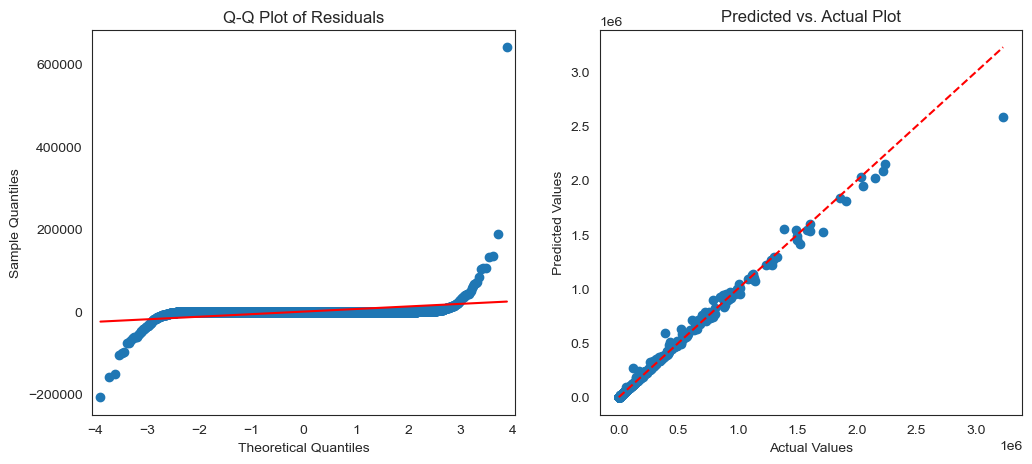

In [124]:
# plot evaluation
plot_evaluation(y, rfm_train_y_pred)

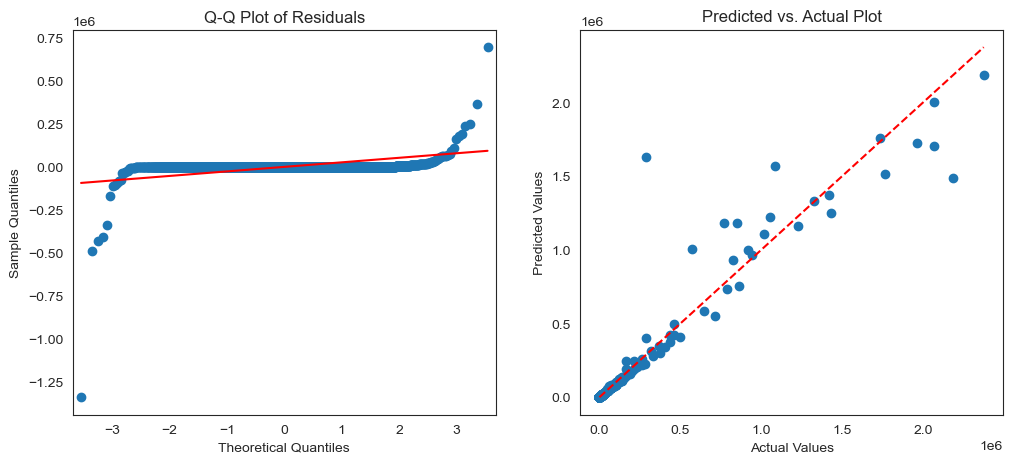

In [125]:
plot_evaluation(test_data_y, rfm_test_y_pred)

**Observation**

On the training data:

- Mean Absolute Error (MAE) is approximately 324.92, indicating that, on average, the model's predictions on the training data are off by about 411 units. This is a relatively low error.
- Root Mean Squared Error (RMSE) is approximately 5919.36 RMSE measures the average magnitude of the model's errors, and a value of 6602.01 suggests that the errors are relatively small.

On the test Validation data:

- MAE is approximately 1791.55, indicating that, on average, the model's predictions on the test data are off by about 608.5 units. While this is higher than the training MAE, it's still a reasonable level of error.
- RMSE is approximately 26001.79. The RMSE on the test data is higher than on the training data, which is expected, but it's still a reasonable level of error.

**This performed better than all the previous model we tested**

#### Catboost

In [126]:
data.head()

,vehicle_regno,vehicle_year,vehicle_age,vehicle_type,city,sum_insured,excess,exposure,annual_claims,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age
0,KDY034NW,2019,4,trailers,klerksdorp,325000.0,32500.0,0.250000,0.00,292500.0,8662.447185,1041,0.00,292500.000000,1.170000e+06,2.340000e+05
1,JZX224MP,2020,0,private/ldv,witbank,417058.0,20852.9,0.250000,0.00,396205.1,1688.681546,52,0.00,396205.100000,1.584820e+06,1.584820e+06
2,HPP748EC,2015,6,trailers,portelizabeth,150000.0,15000.0,1.000000,66548.58,135000.0,9480.434853,1446,66548.58,2.028563,1.350000e+05,1.928571e+04
3,KPD308NW,2021,2,trailers,klerksdorp,495363.0,49536.3,0.166666,0.00,445826.7,8662.447185,1041,0.00,445826.700000,2.674971e+06,8.916570e+05
4,KF90HYGP,2021,0,trailers,nigel,456974.0,45697.4,0.333333,0.00,411276.6,6510.021154,749,0.00,411276.600000,1.233831e+06,1.233831e+06


In [127]:
# Select the independent variables

X_cat = data.drop(['vehicle_regno', 'annual_claims'], axis = 1)
y_cat = data.annual_claims
print(f'Dimension of independent variables is: {X_cat.shape}')
print(f'Dimension of independent variables is: {y_cat.shape}')

Dimension of independent variables is: (25019, 14)
Dimension of independent variables is: (25019,)


In [128]:
# select out the categories variable from the features
X_cat_stand = X_cat.select_dtypes(exclude='category')


# standardize the features without the categories
scaler = StandardScaler()
X_cat_standardized = scaler.fit_transform(X_cat_stand)
X_cat_stand = pd.DataFrame(X_cat_standardized, columns = X_cat_stand.columns)

# assign the vehicle_type and city to the data frame
X_cat_stand[['vehicle_type', 'city']] = data[['vehicle_type', 'city']]
X_cat_stand.head()

,vehicle_year,vehicle_age,sum_insured,excess,exposure,loss_suffered,location_risk_index,vehicle_type_count,claim_frequency,claim_severity,yearly_premium,premium_per_vehicle_age,vehicle_type,city
0,0.502949,-0.354288,-0.496931,-0.492343,-0.774607,-0.497134,-0.004001,1.571353,-0.078564,-0.398532,-0.274585,-0.276433,trailers,klerksdorp
1,0.669497,-1.029108,-0.362644,-0.663094,-0.774607,-0.329245,-0.913605,-1.141663,-0.078564,-0.226822,-0.147436,0.270496,private/ldv,witbank
2,-0.163247,-0.016878,-0.752206,-0.748900,1.497451,-0.752112,0.102691,2.682346,0.220684,-0.882835,-0.591830,-0.363368,trailers,portelizabeth
3,0.836046,-0.691698,-0.248419,-0.242584,-1.027059,-0.248912,-0.004001,1.571353,-0.078564,-0.144661,0.186714,-0.010156,trailers,klerksdorp
4,0.836046,-1.029108,-0.304418,-0.298864,-0.522157,-0.304845,-0.284746,0.770341,-0.078564,-0.201868,-0.255020,0.128385,trailers,nigel


In [129]:
# spilt the data into training and validation set as follows

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat_stand, y_cat,
                                                                     test_size = 0.2,
                                                                     random_state = 10)

In [130]:
X_train_cat.shape

(20015, 14)

In [131]:
X_test_cat.shape

(5004, 14)

**Training CatBoost Model**

In [132]:
%%time
# Initialize rhe algorithm

cat_model = CatBoostRegressor(loss_function='RMSE',
                             cat_features=['vehicle_type', 'city'],
                             random_state = 10
                             )

# fit the base model
cat_model.fit(X_train_cat, y_train_cat, 
              verbose=False)

CPU times: total: 1min 33s
Wall time: 46.4 s


In [133]:
# check the score of the model both on testing and validation
print(f'The performance score on training is: {cat_model.score(X_train_cat, y_train_cat)}')
print(f'The performance score on test data is: {cat_model.score(X_test_cat, y_test_cat)}')

print('-' * 50)
cat_train_y_pred = cat_model.predict(X_train_cat)
cat_test_y_pred = cat_model.predict(X_test_cat)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
cat_train_mae = round(mae(y_train_cat, cat_train_y_pred),2)
print(f'Train CatBoost MAE: {cat_train_mae}')
cat_test_mae = round(mae(y_test_cat, cat_test_y_pred),2)
print(f'Test CatBoost MAE: {cat_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
cat_train_rmse = round(np.sqrt(mse(y_train_cat, cat_train_y_pred)),2)
print(f'Train CatBoost RMSE: {cat_train_rmse}')
cat_test_rmse = round(np.sqrt(mse(y_test_cat, cat_test_y_pred)),2)
print(f'Test CatBoost RMSE: {cat_test_rmse}')


The performance score on training is: 0.999909914734828
The performance score on test data is: 0.9880179253100821
--------------------------------------------------
MAE Evaluation scores for training and validation
Train CatBoost MAE: 194.65
Test CatBoost MAE: 646.53
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train CatBoost RMSE: 822.35
Test CatBoost RMSE: 9042.08


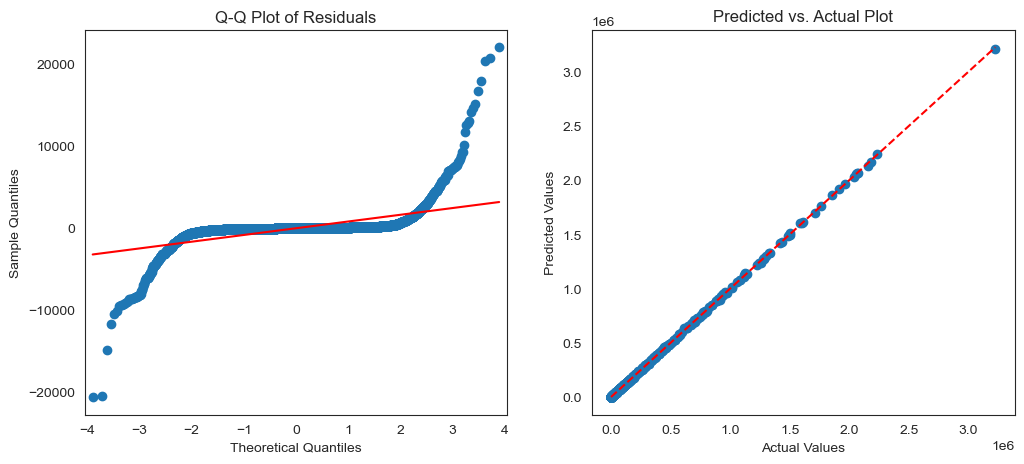

In [134]:
# evaluate the model using the plot functions created above

# Training plot
plot_evaluation(y_train_cat, cat_train_y_pred)

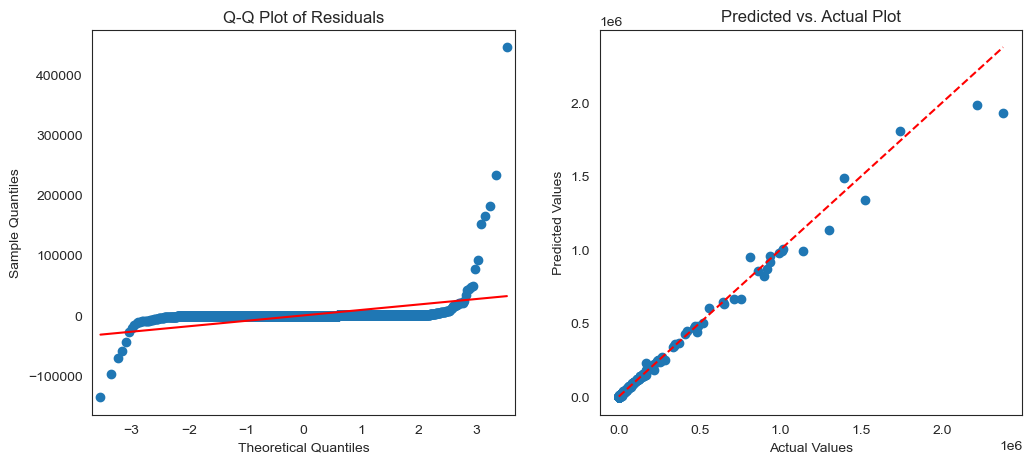

In [135]:
# Validation plot
plot_evaluation(y_test_cat, cat_test_y_pred)

**Observation**

On the training data:

- Mean Absolute Error (MAE) is approximately 194.65, which means that, on average, the model's predictions on the training data are off by about 194.65 units. The MAE value is very low, indicating an extremely high level of accuracy.
- Root Mean Squared Error (RMSE) is approximately 822.35. RMSE measures the average magnitude of the model's errors, and this value is relatively low, indicating that the model's errors are very small.

On the test validation data:

- MAE is approximately 646.53, indicating that, on average, the model's predictions on the test data are off by about 646.53 units. The MAE value is relatively low, suggesting a high level of accuracy.
- RMSE is approximately 9042.08. The RMSE on the test data, while higher than the training data RMSE, is still relatively low, indicating that the model's errors are manageable.

**Conclusively**, These performance metrics indicate that the model is performing exceptionally well. It provides an outstanding fit to both the training and test data, with exceptionally low error metrics (MAE and RMSE). The model's ability to generalize to unseen data is also evident from the high test data R2 value. Overall, this is a top-performing model with extremely high accuracy and low prediction errors.

### XGBOOST

Since XGBoost has its inner mechanism of dealing with categorical features, we'll use the preprocessed data for the catboost algorithm

X_train_cat, X_test_cat, y_train_cat, y_test_cat

In [136]:
import xgboost as xgb

In [137]:
# full train set

X_cat_stand.shape, y_cat.shape

((25019, 14), (25019,))

In [138]:
X_train_cat.shape

(20015, 14)

In [139]:
X_test_cat.shape

(5004, 14)

In [140]:
y_train_cat.shape

(20015,)

In [141]:
y_test_cat.shape

(5004,)

In [142]:
# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train_cat, y_train_cat, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test_cat, y_test_cat, enable_categorical=True)

In [143]:
# set the hyperparameters

# Define hyperparameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 200
}
n = 10000

# create 2 tuples for both the training and validation
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [144]:
# Training the XGBoost

xgb_model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=500,
   # Activate early stopping
   early_stopping_rounds=50
)

[13:38:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-mae:7971.91712	validation-mae:7424.20179
[500]	train-mae:31.17845	validation-mae:553.08540
[1000]	train-mae:9.66869	validation-mae:544.32124
[1500]	train-mae:5.05994	validation-mae:542.14307
[2000]	train-mae:2.95450	validation-mae:540.95152
[2500]	train-mae:1.90160	validation-mae:540.35178
[3000]	train-mae:1.28970	validation-mae:540.00357
[3500]	train-mae:0.91853	validation-mae:539.77254
[4000]	train-mae:0.68089	validation-mae:539.62158
[4500]	train-mae:0.51402	validation-mae:539.51381
[5000]	train-mae:0.40029	validation-mae:539.43953
[5500]	train-mae:0.31827	validation-mae:539.38640
[6000]	train-mae:0.26027	validation-mae:539.34990
[6500]	train-mae:0.21858	validation-mae:539.32317
[7000]	train-mae:0.18999	validation-mae:539.30409
[7500]	train-mae:0.16819	validation-mae:539.28787
[8000]	train-mae:0.15335	validation-mae:539.27656
[85

In [145]:
# Evaluate the model based on the training and validation set

print('-' * 50)
xgb_train_y_pred = xgb_model.predict(dtrain_reg)
xgb_test_y_pred = xgb_model.predict(dtest_reg)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
xgb_train_mae = round(mae(y_train_cat, xgb_train_y_pred),2)
print(f'Train XGBoost MAE: {xgb_train_mae}')
xgb_test_mae = round(mae(y_test_cat, xgb_test_y_pred),2)
print(f'Test XGBoost MAE: {xgb_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
xgb_train_rmse = round(np.sqrt(mse(y_train_cat, xgb_train_y_pred)),2)
print(f'Train XGBoost RMSE: {xgb_train_rmse}')
xgb_test_rmse = round(np.sqrt(mse(y_test_cat, xgb_test_y_pred)),2)
print(f'Test XGBoost RMSE: {xgb_test_rmse}')


--------------------------------------------------
MAE Evaluation scores for training and validation
Train XGBoost MAE: 0.12
Test XGBoost MAE: 539.25
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train XGBoost RMSE: 0.22
Test XGBoost RMSE: 7050.74


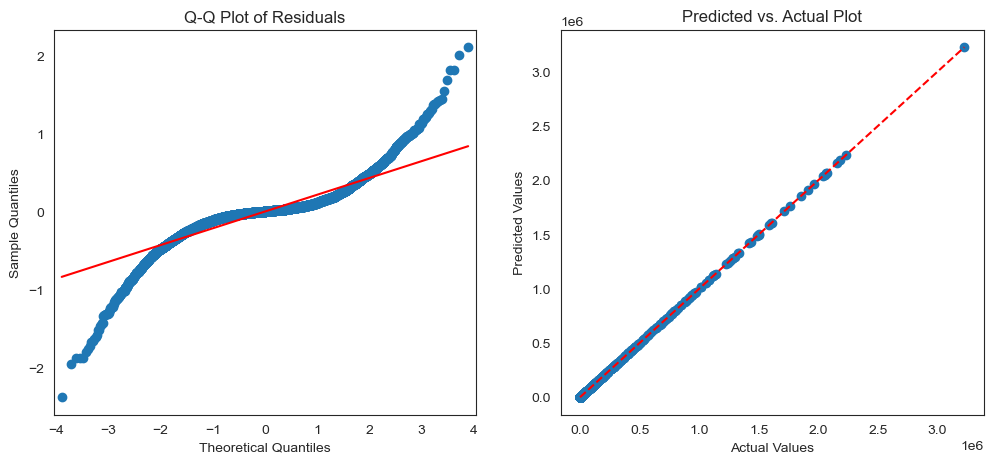

In [146]:
# plot evaluation

# Training performance evaluation
plot_evaluation(y_train_cat, xgb_train_y_pred)

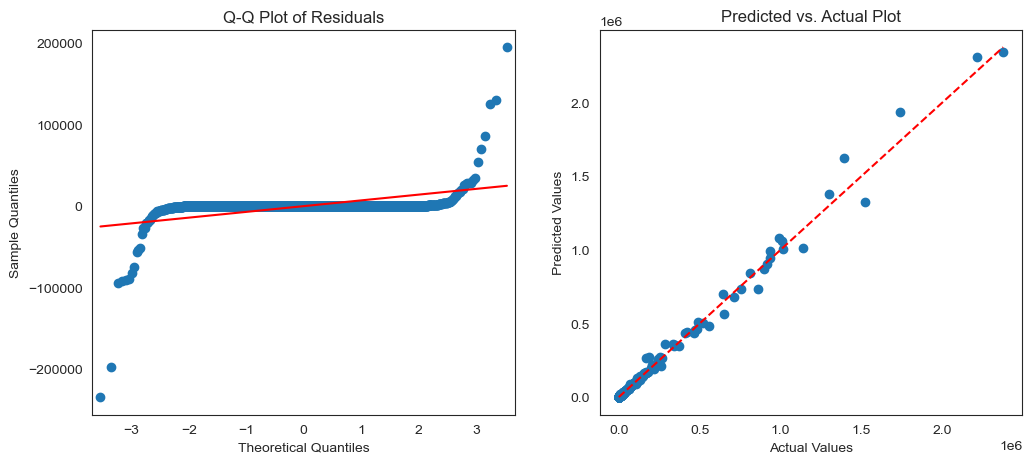

In [147]:
# Unseen data evaluation

plot_evaluation(y_test_cat, xgb_test_y_pred)

In [148]:
# lets perform cross validation

cv_results = xgb.cv(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,  # You can adjust this based on early stopping or other criteria
    nfold=5,  # Number of folds for cross-validation
    metrics=['mae','rmse'],  # Evaluation metric
    early_stopping_rounds=50,  # Early stopping to prevent overfitting
    verbose_eval=1000
)

[13:42:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[13:42:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[13:42:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[13:42:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[13:42:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-mae:8000.71886+350.11882	train-rmse:79588.26714+3315.50344	test-mae:8014.82098+1426.68215	test-rmse:79016.15501+15681.07626
[1000]	train-mae:17.67676+6.43874	train-rmse:39.99608+14.13525	test-mae:957.02201+330.90490	test-rmse:15037.33219+7540.12235
[1296]	trai

In [149]:
# Get the best number of boosting rounds based on early stopping
best_num_boost_rounds = len(cv_results['test-mae-mean'])
print(f"Best number of boosting rounds: {best_num_boost_rounds}")

Best number of boosting rounds: 1248


In [150]:
cv_results[['test-mae-mean', 'test-rmse-mean']].min()

test-mae-mean       953.612740
test-rmse-mean    15036.558237
dtype: float64

In [151]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': ['mae','rmse'],
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 200
}

In [152]:
# train the model on the full train set

xgb_model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=best_num_boost_rounds,
   evals=evals,
   verbose_eval=200,
   # Activate early stopping
   early_stopping_rounds=50
)

[13:43:56] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-mae:7971.91712	train-rmse:79364.84349	validation-mae:7424.20179	validation-rmse:76694.08601
[106]	train-mae:202.85381	train-rmse:1121.02649	validation-mae:640.97085	validation-rmse:7138.13539


In [153]:
# Evaluate the model based on the training and validation set

print('-' * 50)
xgb_train_y_pred = xgb_model.predict(dtrain_reg)
xgb_test_y_pred = xgb_model.predict(dtest_reg)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
xgb_train_mae = round(mae(y_train_cat, xgb_train_y_pred),2)
print(f'Train XGBoost MAE: {xgb_train_mae}')
xgb_test_mae = round(mae(y_test_cat, xgb_test_y_pred),2)
print(f'Test XGBoost MAE: {xgb_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
xgb_train_rmse = round(np.sqrt(mse(y_train_cat, xgb_train_y_pred)),2)
print(f'Train XGBoost RMSE: {xgb_train_rmse}')
xgb_test_rmse = round(np.sqrt(mse(y_test_cat, xgb_test_y_pred)),2)
print(f'Test XGBoost RMSE: {xgb_test_rmse}')


--------------------------------------------------
MAE Evaluation scores for training and validation
Train XGBoost MAE: 202.28
Test XGBoost MAE: 641.83
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train XGBoost RMSE: 1112.62
Test XGBoost RMSE: 7151.81


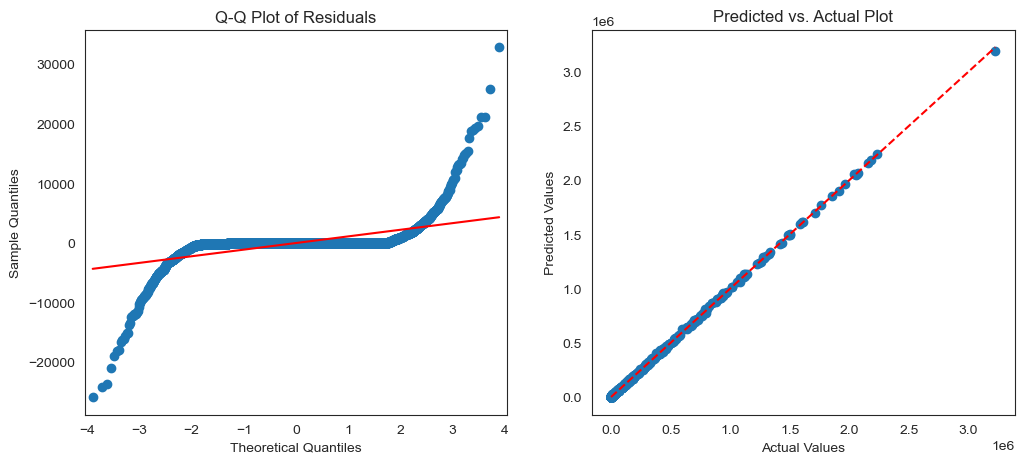

In [154]:
# plot evaluation

# Training performance evaluation
plot_evaluation(y_train_cat, xgb_train_y_pred)

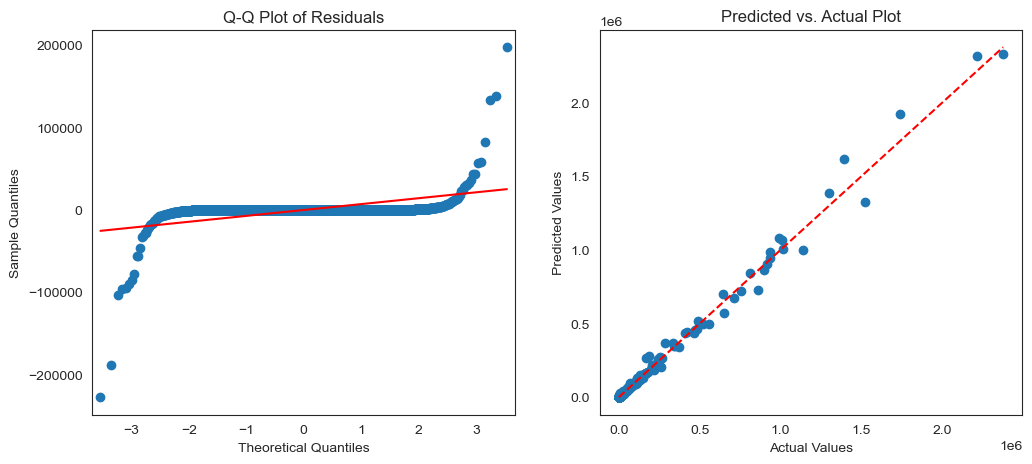

In [155]:
# plot evaluation

# Training performance evaluation
plot_evaluation(y_test_cat, xgb_test_y_pred)

### LightGBM Regressor

In [156]:
import lightgbm as lgb

In [157]:
X_train_cat.shape

(20015, 14)

In [158]:
X_test_cat.shape

(5004, 14)

In [159]:
y_train_cat.shape

(20015,)

In [160]:
y_test_cat.shape

(5004,)

In [161]:
# Create a LightGBM dataset
lgbm_train_data = lgb.Dataset(X_train_cat, label=y_train_cat, categorical_feature=['vehicle_type', 'city'])

# # create the test lightgbm dataset
lgbm_test_data = lgb.Dataset(X_test_cat, label=y_test_cat, categorical_feature=['vehicle_type', 'city'])

In [162]:
# Define hyperparameters
params = {
    'objective': 'regression',
    'metric': ['mae','rmse'],
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 1.0,
    'n_estimators': 200,
    'force_col_wise' : True
}

# Train the LightGBM model
num_boost_round = 10000  
lgb_model = lgb.train(
    params = params, 
    train_set = lgbm_train_data, 
    num_boost_round=num_boost_round,
    valid_sets = lgbm_test_data,
    early_stopping_rounds = 50,
    verbose_eval = 250
)


[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 20015, number of used features: 14
[LightGBM] [Info] Start training from score 8823.419174
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	valid_0's l1: 741.376	valid_0's rmse: 10724.7


In [163]:
# Evaluate the model based on the training and validation set

print('-' * 50)
lgb_train_y_pred = lgb_model.predict(X_train_cat)
lgb_test_y_pred = lgb_model.predict(X_test_cat)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
lgb_train_mae = round(mae(y_train_cat, lgb_train_y_pred),2)
print(f'Train LGBM MAE: {lgb_train_mae}')
lgb_test_mae = round(mae(y_test_cat, lgb_test_y_pred),2)
print(f'Test LGBM MAE: {lgb_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
lgb_train_rmse = round(np.sqrt(mse(y_train_cat, lgb_train_y_pred)),2)
print(f'Train LGBM RMSE: {lgb_train_rmse}')
lgb_test_rmse = round(np.sqrt(mse(y_test_cat, lgb_test_y_pred)),2)
print(f'Test LGBM RMSE: {lgb_test_rmse}')


--------------------------------------------------
MAE Evaluation scores for training and validation
Train LGBM MAE: 743.31
Test LGBM MAE: 741.38
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train LGBM RMSE: 12648.59
Test LGBM RMSE: 10724.7


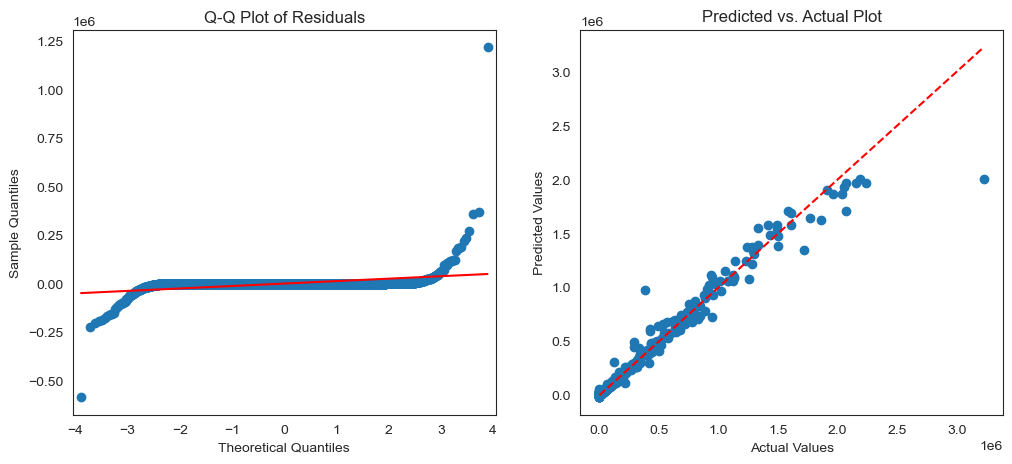

In [164]:
# plot evaluation on model training

plot_evaluation(y_train_cat, lgb_train_y_pred)

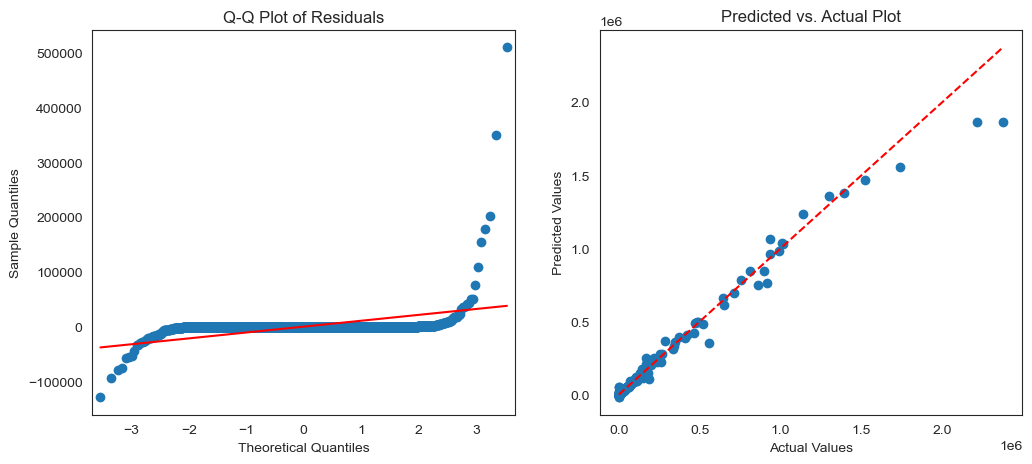

In [165]:
# plot evaluation on test data

plot_evaluation(y_test_cat, lgb_test_y_pred)

In [166]:
# Create a LightGBM dataset
lgbm_train_data = lgb.Dataset(X_train_cat, label=y_train_cat, categorical_feature=['vehicle_type', 'city'])

# # create the test lightgbm dataset
lgbm_test_data = lgb.Dataset(X_test_cat, label=y_test_cat, categorical_feature=['vehicle_type', 'city'])



# Perform cross-validation
num_boost_round = 10000  # You can adjust this based on early stopping or other criteria
cv_results = lgb.cv(
    params = params,
    train_set = lgbm_train_data,
    num_boost_round=num_boost_round,
    nfold=5,  # Number of folds for cross-validation
    stratified=False,  # Since it's regression, not classification
    early_stopping_rounds=50,  # Early stopping to prevent overfitting
    verbose_eval=50,  # Print evaluation results every 10 rounds
)

# Get the best number of boosting rounds based on early stopping
best_num_boost_rounds = len(cv_results['l1-mean'])
print(f"Best number of boosting rounds: {best_num_boost_rounds}")

[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 16012, number of used features: 14
[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 16012, number of used features: 14
[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 16012, number of used features: 14
[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 16012, number of used features: 14
[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 16012, number of used features: 14
[LightGBM] [Info] Start training from score 8417.761197
[LightGBM] [Info] Start training from score 9551.929158
[LightGBM] [Info] Start training from score 8800.396079
[LightGBM] [Info] Start training from score 8622.971929
[LightGBM] [Info] Start training from score 8724.037507
[50]	cv_agg's l1: 2102.2 + 474.295	cv_agg's rmse: 22351.9 + 9089.35
[100]	cv_agg's l1

In [167]:
# Create a LightGBM dataset
lgbm_train_data = lgb.Dataset(X_train_cat, label=y_train_cat, categorical_feature=['vehicle_type', 'city'])

# # create the test lightgbm dataset
lgbm_test_data = lgb.Dataset(X_test_cat, label=y_test_cat, categorical_feature=['vehicle_type', 'city'])

# Train the final LightGBM model with the best number of boosting rounds
final_model = lgb.train(
    params = params, 
    train_set = lgbm_train_data, 
    num_boost_round=best_num_boost_rounds,
    valid_sets = lgbm_test_data,
    early_stopping_rounds = 50,
    verbose_eval = 100
)

[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 20015, number of used features: 14
[LightGBM] [Info] Start training from score 8823.419174
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l1: 789.448	valid_0's rmse: 11366.5
Early stopping, best iteration is:
[137]	valid_0's l1: 741.376	valid_0's rmse: 10724.7


In [168]:
# Evaluate the model based on the training and validation set

print('-' * 50)
lgb_train_y_pred = lgb_model.predict(X_train_cat)
lgb_test_y_pred = lgb_model.predict(X_test_cat)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
lgb_train_mae = round(mae(y_train_cat, lgb_train_y_pred),2)
print(f'Train LGBM MAE: {lgb_train_mae}')
lgb_test_mae = round(mae(y_test_cat, lgb_test_y_pred),2)
print(f'Test LGBM MAE: {lgb_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
lgb_train_rmse = round(np.sqrt(mse(y_train_cat, lgb_train_y_pred)),2)
print(f'Train LGBM RMSE: {lgb_train_rmse}')
lgb_test_rmse = round(np.sqrt(mse(y_test_cat, lgb_test_y_pred)),2)
print(f'Test LGBM RMSE: {lgb_test_rmse}')


--------------------------------------------------
MAE Evaluation scores for training and validation
Train LGBM MAE: 743.31
Test LGBM MAE: 741.38
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train LGBM RMSE: 12648.59
Test LGBM RMSE: 10724.7


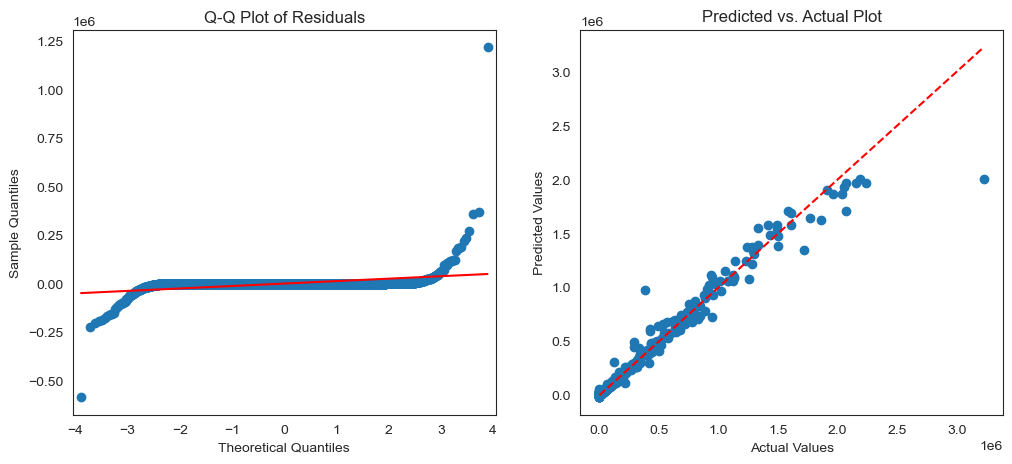

In [169]:
# plot evaluation on model training

plot_evaluation(y_train_cat, lgb_train_y_pred)

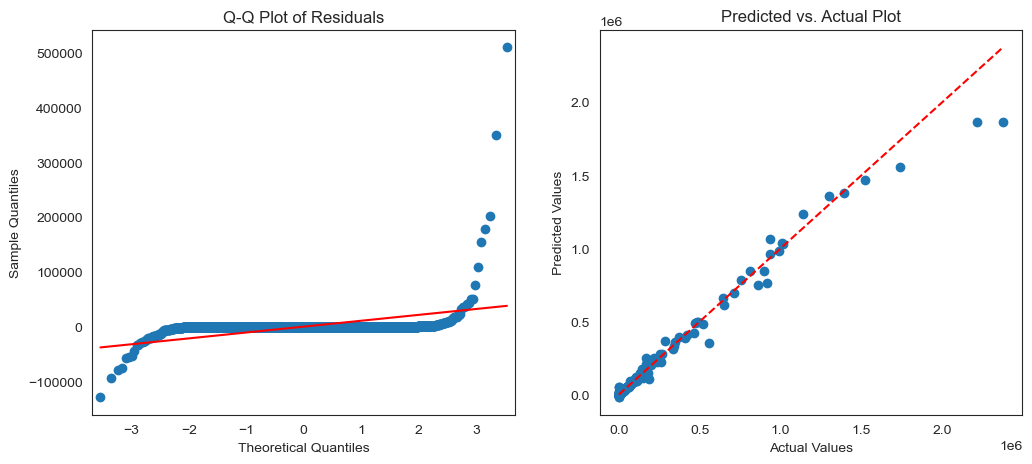

In [170]:
# plot evaluation on unseen data

plot_evaluation(y_test_cat, lgb_test_y_pred)

### Explainable Boosting Machines

In [171]:
X_stand.shape, y.shape

((20015, 14), (20015,))

In [172]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16012, 14), (4003, 14), (16012,), (4003,))

In [173]:
test_data_X.shape, test_data_y.shape

((5004, 14), (5004,))

**Training**

In [174]:
# Create and train the Explainable Boosting Machine model

# Initializa the model
ebm = ExplainableBoostingRegressor(random_state=0, n_jobs=-1)

# fit the data to the model
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(n_jobs=-1, random_state=0)

In [175]:
# Visualize the global feature importance
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2150147533696/ -->

In [176]:
# Perform cross-validation and find the best parameters


ebm_param_grid = {
    'early_stopping_rounds': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_rounds': [50, 100, 200],
    'objective': ['rmse', 'poisson', 'tweedie', 'gamma', 'huber', 'rmse_deviance'],
}

ebm_grid_search = GridSearchCV(ebm, ebm_param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)
ebm_grid_search.fit(X_train, y_train)

# get the best estimator
ebm_model = ebm_grid_search.best_estimator_

# Get the best parameters
ebm_best_params = ebm_grid_search.best_params_
print(ebm_best_params)

{'early_stopping_rounds': 10, 'learning_rate': 0.05, 'max_rounds': 200, 'objective': 'rmse'}


In [177]:
# Evaluate the model based on the training and validation set

print('-' * 50)
ebm_train_y_pred = ebm_model.predict(X_stand)
ebm_test_y_pred = ebm_model.predict(test_data_X)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
ebm_train_mae = round(mae(y, ebm_train_y_pred),2)
print(f'Train EBM MAE: {ebm_train_mae}')
ebm_test_mae = round(mae(test_data_y, ebm_test_y_pred),2)
print(f'Test EBM MAE: {ebm_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
ebm_train_rmse = round(np.sqrt(mse(y, ebm_train_y_pred)),2)
print(f'Train EBM RMSE: {ebm_train_rmse}')
ebm_test_rmse = round(np.sqrt(mse(test_data_y, ebm_test_y_pred)),2)
print(f'Test EBM RMSE: {ebm_test_rmse}')


--------------------------------------------------
MAE Evaluation scores for training and validation
Train EBM MAE: 3271.59
Test EBM MAE: 186341.43
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train EBM RMSE: 11158.43
Test EBM RMSE: 689427.51


In [178]:
# Retrain the model on the full train set
ebm_model = ExplainableBoostingRegressor(random_state=10, n_jobs=-1, **ebm_best_params)

# fit the data to the model
ebm_model.fit(X_stand, y)

ExplainableBoostingRegressor(early_stopping_rounds=10, learning_rate=0.05,
                             max_rounds=200, n_jobs=-1, random_state=10)

In [179]:
# Evaluate the model based on the training and validation set

print('-' * 50)
ebm_train_y_pred = ebm_model.predict(X_stand)
ebm_test_y_pred = ebm_model.predict(test_data_X)


# Evaluation
print(f'MAE Evaluation scores for training and validation')
ebm_train_mae = round(mae(y, ebm_train_y_pred),2)
print(f'Train EBM MAE: {ebm_train_mae}')
ebm_test_mae = round(mae(test_data_y, ebm_test_y_pred),2)
print(f'Test EBM MAE: {ebm_test_mae}')

print('-' * 50)

print(f'RMSE Evaluation scores for training and validation')
ebm_train_rmse = round(np.sqrt(mse(y, ebm_train_y_pred)),2)
print(f'Train EBM RMSE: {ebm_train_rmse}')
ebm_test_rmse = round(np.sqrt(mse(test_data_y, ebm_test_y_pred)),2)
print(f'Test EBM RMSE: {ebm_test_rmse}')


--------------------------------------------------
MAE Evaluation scores for training and validation
Train EBM MAE: 3096.94
Test EBM MAE: 160957.56
--------------------------------------------------
RMSE Evaluation scores for training and validation
Train EBM RMSE: 13445.52
Test EBM RMSE: 583912.61


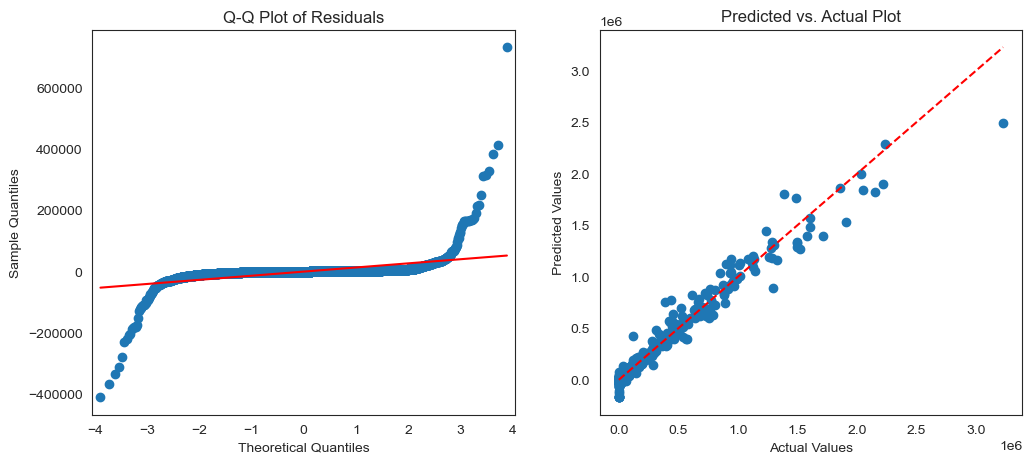

In [180]:
# plot evaluation on train set

plot_evaluation(y, ebm_train_y_pred)

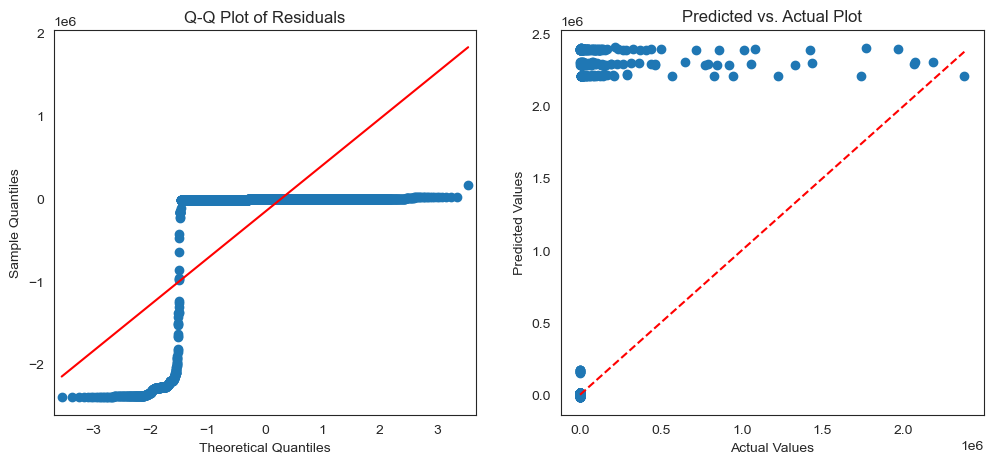

In [181]:
# plot evaluation on unseen data

plot_evaluation(test_data_y, ebm_test_y_pred)

### Summary Table 

In [235]:
# create a dictionary with the evaluation metrics

evaluation_data = {
    'Models':['GLM Model', 'RFM Model', 'CatBoost', 'XGBoost', 'LightGBM', 'EBM Model'],
    'Train RMSE': [glm_train_rmse, rfm_train_rmse, cat_train_rmse, xgb_train_rmse, lgb_train_rmse, ebm_train_rmse],
    'Test RMSE': [glm_test_rmse, rfm_test_rmse, cat_test_rmse, xgb_test_rmse, lgb_test_rmse, ebm_test_rmse],
    'Train MAE': [glm_train_mae, rfm_train_mae, cat_train_mae, xgb_train_mae, lgb_train_mae, ebm_train_mae],
    'Test MAE': [glm_test_mae, rfm_test_mae, cat_test_mae, xgb_test_mae, lgb_test_mae, ebm_test_mae]
}

In [236]:
# pass the dictionary to the pandas method to create a data frame

eval_sum_df = pd.DataFrame(data = evaluation_data)
eval_sum_df

,Models,Train RMSE,Test RMSE,Train MAE,Test MAE
0,GLM Model,44564.66,51099.16,7866.23,8133.73
1,RFM Model,6237.48,26425.72,325.96,1793.56
2,CatBoost,822.35,9042.08,194.65,646.53
3,XGBoost,1112.62,7151.81,202.28,641.83
4,LightGBM,12648.59,10724.70,743.31,741.38
5,EBM Model,13445.52,583912.61,3096.94,160957.56


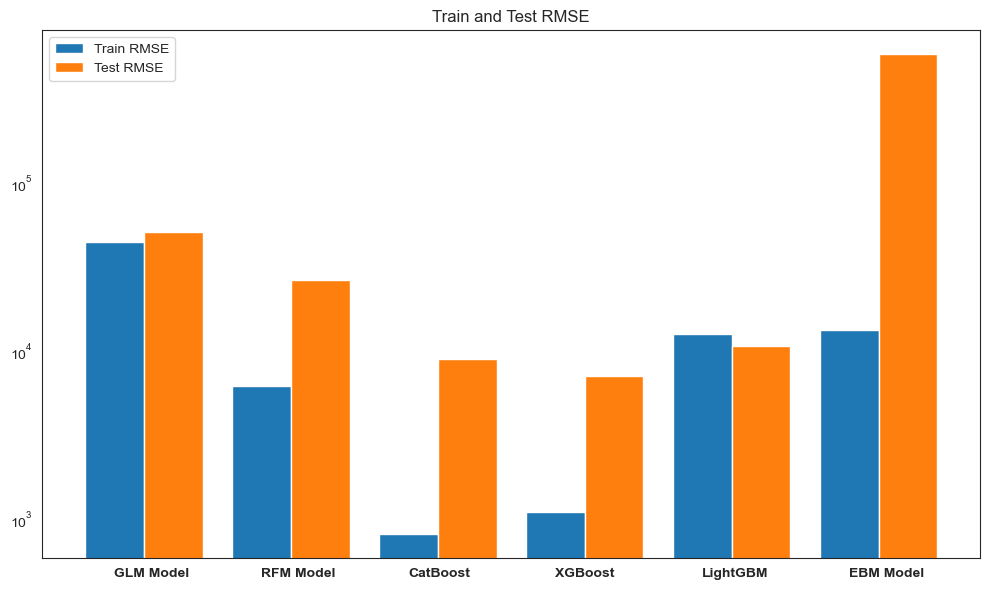

In [237]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Bar width
bar_width = 0.4
xvalues = np.arange(len(eval_sum_df['Models']))
plt.bar(xvalues, eval_sum_df['Train RMSE'], width = bar_width, log = True, label = 'Train RMSE')
plt.bar(xvalues + bar_width, eval_sum_df['Test RMSE'], width = bar_width, log = True, label = 'Test RMSE')
plt.title('Train and Test RMSE')
plt.xticks(xvalues, eval_sum_df['Models'], ha='left',  fontweight='bold')
plt.tight_layout()
plt.legend()

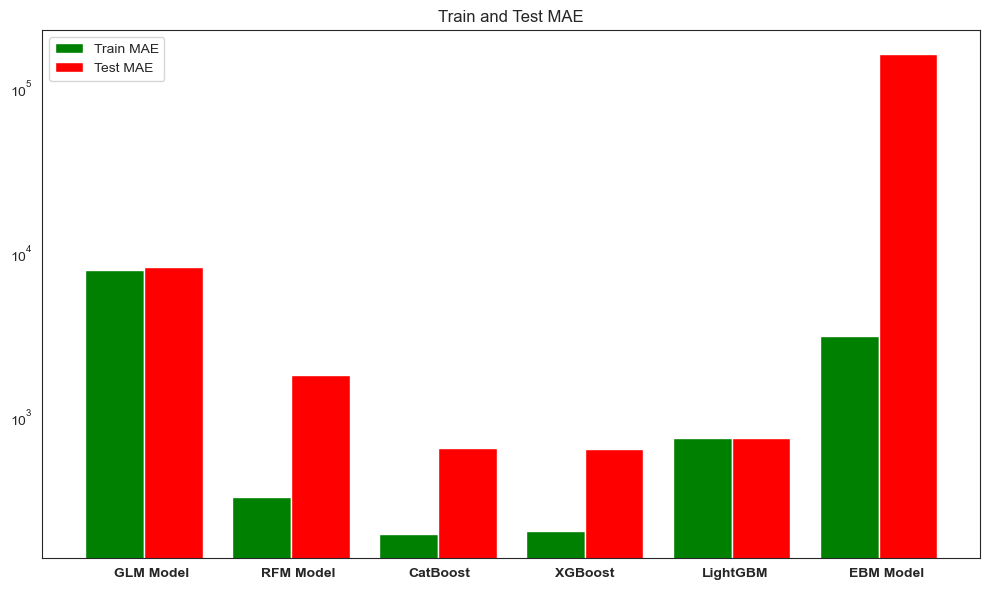

In [238]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Bar width
bar_width = 0.4
xvalues = np.arange(len(eval_sum_df['Models']))
plt.bar(xvalues, eval_sum_df['Train MAE'], width = bar_width, log = True, color = 'green', label = 'Train MAE')
plt.bar(xvalues + bar_width, eval_sum_df['Test MAE'], width = bar_width, color = 'red', log = True, label = 'Test MAE')
plt.title('Train and Test MAE')
plt.xticks(xvalues, eval_sum_df['Models'], ha='left',  fontweight='bold')
plt.tight_layout()
plt.legend()

**Summary:**

- Based on the evaluation metrics in the summary table and the evaluation visual, it can be concluded that among the algorithms considered for predicting annual claims data, XGBoost and CatBoost exhibit the most promising performance. These models consistently demonstrate lower RMSE and MAE values on both the training and test datasets compared to other algorithms such as Generalized Linear Model, Random Forest, LightGBM, and Explainable Boosting Machines.

- While Random Forest also performs well, XGBoost and CatBoost outshine it in terms of lower MAE values on the testing set, indicating a potentially more accurate prediction of annual claims. Furthermore, the relatively lower difference between the training and test RMSE for XGBoost suggests that it may offer better generalization to new data, making it a robust choice for production deployment.

**In conclusion,** based on the metrics provided, XGBoost appears to be a strong candidate for predicting annual claims data. However, the final decision should also take into consideration other factors such as computational efficiency, and specific requirements for deployment in a production environment. It is advisable to conduct a thorough assessment and possibly perform additional validation to ensure the chosen model aligns with the overall goals and constraints of the project.